In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_pop = pd.read_csv("df_population.csv")
df_veg = pd.read_csv("df_vegetal.csv")
df_anim = pd.read_csv("nouveau_animaux.csv")

In [3]:
"""
1) Nettoyer les titres de colonnes :
Supprimer les espaces au début et à la fin des titres
Remplacer les espaces par des underscores (ceux se situant entre les mots)
Tout mettre en minuscule
"""
df_pop.columns = df_pop.columns.str.replace(' ', '_').str.lower()
df_anim.columns = df_anim.columns.str.replace(' ', '_').str.lower()
df_veg.columns = df_veg.columns.str.replace(' ', '_').str.lower()

### 2) Quelles sont les dimensions des jeux de données ?

In [4]:
print(f"Dimensions du df_pop : {df_pop.ndim}. Shape du df_pop : {df_pop.shape}")
print(f"Dimensions du df_anim : {df_anim.ndim}. Shape du df_anim : {df_anim.shape}")
print(f"Dimensions du df_veg : {df_veg.ndim}. Shape du df_veg : {df_veg.shape}")

Dimensions du df_pop : 2. Shape du df_pop : (364, 14)
Dimensions du df_anim : 2. Shape du df_anim : (27713, 14)
Dimensions du df_veg : 2. Shape du df_veg : (92233, 14)


### 3) A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [5]:
df_pop.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,36686.78,X,Figure from international organizations
1,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,37769.50,X,Figure from international organizations
2,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,2877.01,X,Figure from international organizations
3,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,2873.88,X,Figure from international organizations
4,FBS,Food Balances (2010-),12,Algeria,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,41927.01,X,Figure from international organizations


In [6]:
df_veg.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,162.62,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2019,2019,kg,160.40,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2018,2018,kcal/cap/d,1365.34,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2019,2019,kcal/cap/d,1346.93,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2511,Wheat and products,2018,2018,g/cap/d,41.23,E,Estimated value


In [7]:
df_anim.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.67,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.76,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2018,2018,kcal/cap/d,14.92,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2019,2019,kcal/cap/d,15.42,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2018,2018,g/cap/d,1.12,E,Estimated value


### 4) Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’. Une fois cette étape effectuée, regroupez les deux jeux de données en 1 et appelez ce DataFrame product. Attention à bien comprendre la structure des données pour utiliser la bonne méthode.

In [8]:
df_anim["type"] = "animal"
df_veg["type"] = "vegetal"
df_products = pd.merge(df_veg, df_anim, how = "outer")

### 5) Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. Renommer la colonne ‘value’ en ‘pop_1000_hab’

In [9]:
df_pop.head(3)
df_pop = df_pop[["area_code_(m49)", "area", "year", "value"]]
df_pop = df_pop.rename(columns={"value" : "pop_1000_hab"})
df_pop

,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,36686.78
1,4,Afghanistan,2019,37769.50
2,8,Albania,2018,2877.01
3,8,Albania,2019,2873.88
4,12,Algeria,2018,41927.01
...,...,...,...,...
359,887,Yemen,2019,31546.69
360,894,Zambia,2018,17835.89
361,894,Zambia,2019,18380.48
362,716,Zimbabwe,2018,15052.18


### 6) Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit.

In [10]:
df_products = df_products[["area_code_(m49)", "area", "element", "item", "year", "type", "unit", "value"]]
df_products

,area_code_(m49),area,element,item,year,type,unit,value
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23
...,...,...,...,...,...,...,...,...
119941,716,Zimbabwe,Fat supply quantity (g/capita/day),"Molluscs, Other",2019,animal,g/cap/d,0.00
119942,716,Zimbabwe,Food supply quantity (kg/capita/yr),"Aquatic Animals, Others",2019,animal,kg,0.00
119943,716,Zimbabwe,Food supply (kcal/capita/day),"Aquatic Animals, Others",2019,animal,kcal/cap/d,0.00
119944,716,Zimbabwe,Protein supply quantity (g/capita/day),"Aquatic Animals, Others",2019,animal,g/cap/d,0.00


### 7) Fusionnez df_pop avec product et nommez ce DataFrame df. Afin de fusionner ces jeux de données vous devez identifier les clés primaires. Renommer les colonnes comme sur le capture d’écran ci-dessous.

In [11]:
df = pd.merge(df_products, df_pop, on=["area", "year", "area_code_(m49)"], how="left")
df

,area_code_(m49),area,element,item,year,type,unit,value,pop_1000_hab
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62,36686.78
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40,37769.50
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34,36686.78
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93,37769.50
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23,36686.78
...,...,...,...,...,...,...,...,...,...
119941,716,Zimbabwe,Fat supply quantity (g/capita/day),"Molluscs, Other",2019,animal,g/cap/d,0.00,15354.61
119942,716,Zimbabwe,Food supply quantity (kg/capita/yr),"Aquatic Animals, Others",2019,animal,kg,0.00,15354.61
119943,716,Zimbabwe,Food supply (kcal/capita/day),"Aquatic Animals, Others",2019,animal,kcal/cap/d,0.00,15354.61
119944,716,Zimbabwe,Protein supply quantity (g/capita/day),"Aquatic Animals, Others",2019,animal,g/cap/d,0.00,15354.61


### 8) Quelles sont les types de données de chaque colonne ?

In [12]:
df.dtypes

area_code_(m49)      int64
area                object
element             object
item                object
year                 int64
type                object
unit                object
value              float64
pop_1000_hab       float64
dtype: object

### 9) Combien y-a t’il de valeurs manquantes par variable ?

In [13]:
df.isna().sum()

area_code_(m49)    0
area               0
element            0
item               0
year               0
type               0
unit               0
value              0
pop_1000_hab       0
dtype: int64

### 10) Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.

In [14]:
df.describe()

,area_code_(m49),year,value,pop_1000_hab
count,119946.000000,119946.000000,119946.000000,1.199460e+05
mean,427.344122,2018.509062,11.643984,4.327827e+04
std,250.391442,0.499920,56.450984,1.534066e+05
min,4.000000,2018.000000,0.000000,1.213000e+01
25%,208.000000,2018.000000,0.010000,2.508880e+03
50%,422.000000,2019.000000,0.270000,9.958830e+03
75%,642.000000,2019.000000,3.330000,3.154669e+04
max,894.000000,2019.000000,1744.850000,1.421864e+06


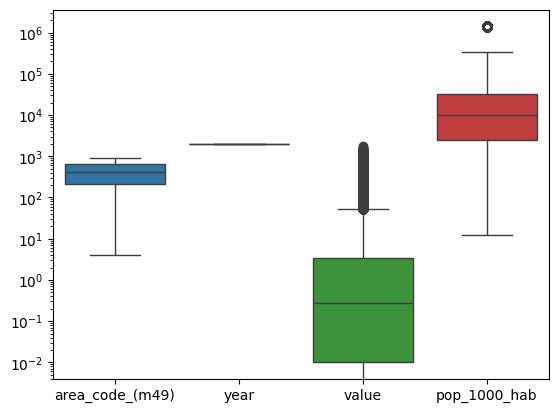

In [15]:
sns.boxplot(data=df, whis=15)
plt.yscale("log")
plt.show()

### 11) Affichez les valeurs uniques de la colonne country

In [16]:
df["area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polyn

 ### 12) Gardez uniquement les informations relatives aux pays (supprimez les zones géographiques ou économiques) Note : en fonction de votre méthode d’importation de données cette étape est facultative.

In [17]:
#RAS
df

,area_code_(m49),area,element,item,year,type,unit,value,pop_1000_hab
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62,36686.78
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40,37769.50
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34,36686.78
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93,37769.50
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23,36686.78
...,...,...,...,...,...,...,...,...,...
119941,716,Zimbabwe,Fat supply quantity (g/capita/day),"Molluscs, Other",2019,animal,g/cap/d,0.00,15354.61
119942,716,Zimbabwe,Food supply quantity (kg/capita/yr),"Aquatic Animals, Others",2019,animal,kg,0.00,15354.61
119943,716,Zimbabwe,Food supply (kcal/capita/day),"Aquatic Animals, Others",2019,animal,kcal/cap/d,0.00,15354.61
119944,716,Zimbabwe,Protein supply quantity (g/capita/day),"Aquatic Animals, Others",2019,animal,g/cap/d,0.00,15354.61


### 13) Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item. Les valeurs de la colonne element doivent être séparées dans des colonnes différentes. Recherchez sur internet la différence entre les formats long et les formats wide. Pour réussir cette étape creuser la méthode pivot_table. Il est préférable d’appliquer la méthode reset_index() après avoir utilisé la méthode précédente.

In [18]:
# MODIFICATION DU NOM DE LA VARIABLE AREA_CODE
df = df.rename(columns={"area_code_(m49)" : "area_code"})
df = df.rename(columns={"element" : "index"})

In [19]:
df = df.pivot_table(index=["area_code", "area", "year", "pop_1000_hab", "type", "item"], columns="index", values="value")

In [20]:
df = df.reset_index()
df

index,area_code,area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


### 14) Faire du nettoyage dans le nom des colonnes
Notez bien la dimension du jeu de données. Si tout s'est bien déroulé vous devez avoir le même resultat, sinon revoyez les étapes précédentes.

In [21]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.shape

(30016, 10)

In [22]:
df = df.rename(columns={"area":"country", "area_code" : "country_code"})
df 

index,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


### 15) Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018

In [23]:
filtre_2018 = df["year"] == 2018
df[filtre_2018]

index,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
29926,894,Zambia,2018,17835.89,vegetal,Tea (including mate),0.00,0.04,0.11,0.00
29927,894,Zambia,2018,17835.89,vegetal,Tomatoes and products,0.01,0.77,1.38,0.03
29928,894,Zambia,2018,17835.89,vegetal,"Vegetables, other",0.18,15.27,20.14,1.28
29929,894,Zambia,2018,17835.89,vegetal,Wheat and products,0.29,60.49,7.99,1.91


### 16) Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique. J’ai récupéré ces informations pour vous sur le site de la FAO. Effectuer un merge entre ce jeu de données et le vôtre.
BONUS Créer ce jeu de données par vous même sur le site de la FAO.

In [24]:
# CSV sur FAO
df_regions = pd.read_csv('continents.csv')
df_regions.columns = df_regions.columns.str.replace(' ', '_').str.lower()
df_regions = df_regions[["country_group", "country", "m49_code"]]
df_regions = df_regions.rename(columns={"m49_code" : "country_code"})
df_regions 

,country_group,country,country_code
0,Africa,"Africa, unspecified",577.0
1,Africa,Algeria,12.0
2,Africa,Angola,24.0
3,Africa,Benin,204.0
4,Africa,Botswana,72.0
...,...,...,...
2538,World,Yemen Ar Rp,886.0
2539,World,Yemen Dem,720.0
2540,World,Yugoslav SFR,890.0
2541,World,Zambia,894.0


In [25]:
df_regions["country_code"] = df_regions["country_code"].fillna(0).astype(int)
df_regions["country_code"] = df_regions["country_code"].astype(int)

In [26]:
df_zones_geo = pd.DataFrame({"country_group" : ['Caribbean',
       'Central America', 'Central Asia',
       'Eastern Africa', 'Eastern Asia',
       'Eastern Europe', 'Middle Africa',
       'Northern Africa', 'Northern America', 'Northern Europe',
       'Oceania', 'South America', 'Southern Africa', 'Southern Asia','Southern Europe',
       'Sub-Saharan Africa',
       'Western Africa', 'Western Asia','Western Europe']})

df_zones_geo

,country_group
0,Caribbean
1,Central America
2,Central Asia
3,Eastern Africa
4,Eastern Asia
5,Eastern Europe
6,Middle Africa
7,Northern Africa
8,Northern America
9,Northern Europe


In [27]:
df_merge = pd.merge(df_zones_geo, df_regions, on="country_group", how="left")
df_merge[["country", "country_code"]] = df_merge[["country", "country_code"]].drop_duplicates()
df_merge

,country_group,country,country_code
0,Caribbean,Anguilla,660.0
1,Caribbean,Antigua and Barbuda,28.0
2,Caribbean,Aruba,533.0
3,Caribbean,Bahamas,44.0
4,Caribbean,Barbados,52.0
...,...,...,...
327,Western Europe,Luxembourg,442.0
328,Western Europe,Monaco,492.0
329,Western Europe,Netherlands (Kingdom of the),528.0
330,Western Europe,Switzerland,756.0


In [28]:
df_continents = pd.read_csv("continents-according-to-our-world-in-data.csv")
df_continents.columns = df_continents.columns.str.replace(" ", "_").str.lower()
df_continents = df_continents.rename(columns={"entity": "country"})
df_continents = df_continents[["country", "continent"]]
df_continents 

,country,continent
0,Abkhazia,Asia
1,Afghanistan,Asia
2,Akrotiri and Dhekelia,Asia
3,Aland Islands,Europe
4,Albania,Europe
...,...,...
280,Yemen People's Republic,Asia
281,Yugoslavia,Europe
282,Zambia,Africa
283,Zanzibar,Africa


In [29]:
df = pd.merge(df, df_merge, on=["country_code", "country"], how="left")
df

,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),country_group
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12,Southern Asia
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02,Southern Asia
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00,Southern Asia
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03,Southern Asia
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00,Eastern Africa
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03,Eastern Africa
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12,Eastern Africa
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80,Eastern Africa


In [30]:
final_df = pd.merge(df, df_continents, on=["country"], how="left")
final_df = final_df[["continent", "country_group", "country_code","country","year",	"pop_1000_hab",	"type",	"item",	"fat_supply_quantity_(g/capita/day)",	"food_supply_(kcal/capita/day)",	"food_supply_quantity_(kg/capita/yr)",	"protein_supply_quantity_(g/capita/day)"]]
final_df.rename(columns={"country_group" : "geographical_area"})
final_df

,continent,country_group,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...
30011,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
30012,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
30013,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
30014,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


### 17) Quelle est la médiane de la variable food_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? Interpréter ces valeurs en les intégrant dasn une phrase.

In [31]:
final_df.head(1)

,continent,country_group,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12


In [32]:
final_df["food_supply_quantity_(g/capita/day)"] = [value*1000/365 for value in final_df["food_supply_quantity_(kg/capita/yr)"]]
describe_food_supply = final_df["food_supply_quantity_(g/capita/day)"].describe()
print(describe_food_supply)
print(" ")
print(f'Au moins 1/4, (25%) des valeurs sont inférieures ou égales à {round(describe_food_supply.loc["25%"],3)} (Q1).')
print(f'Au moins 3/4 (75%) des valeurs sont inférieures où égales à {round(describe_food_supply.loc["75%"], 3)} (Q3). ') 
print(f'Au moins la moitié (50%) des valeurs sont inférieures ou égales à la médiane (qui est de : {round(describe_food_supply.loc["50%"], 3)})')
print(f"L'écart-type mesure la dispersion des valeurs par rapport à la moyenne. L'écart-type ici est plus élevé que la moyenne et indique donc une dispersion plus grande.")

count    29931.000000
mean        25.196899
std         74.441654
min          0.000000
25%          0.164384
50%          2.356164
75%         15.972603
max       3707.589041
Name: food_supply_quantity_(g/capita/day), dtype: float64
 
Au moins 1/4, (25%) des valeurs sont inférieures ou égales à 0.164 (Q1).
Au moins 3/4 (75%) des valeurs sont inférieures où égales à 15.973 (Q3). 
Au moins la moitié (50%) des valeurs sont inférieures ou égales à la médiane (qui est de : 2.356)
L'écart-type mesure la dispersion des valeurs par rapport à la moyenne. L'écart-type ici est plus élevé que la moyenne et indique donc une dispersion plus grande.


### 18) Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)

C:\Users\Thibaut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


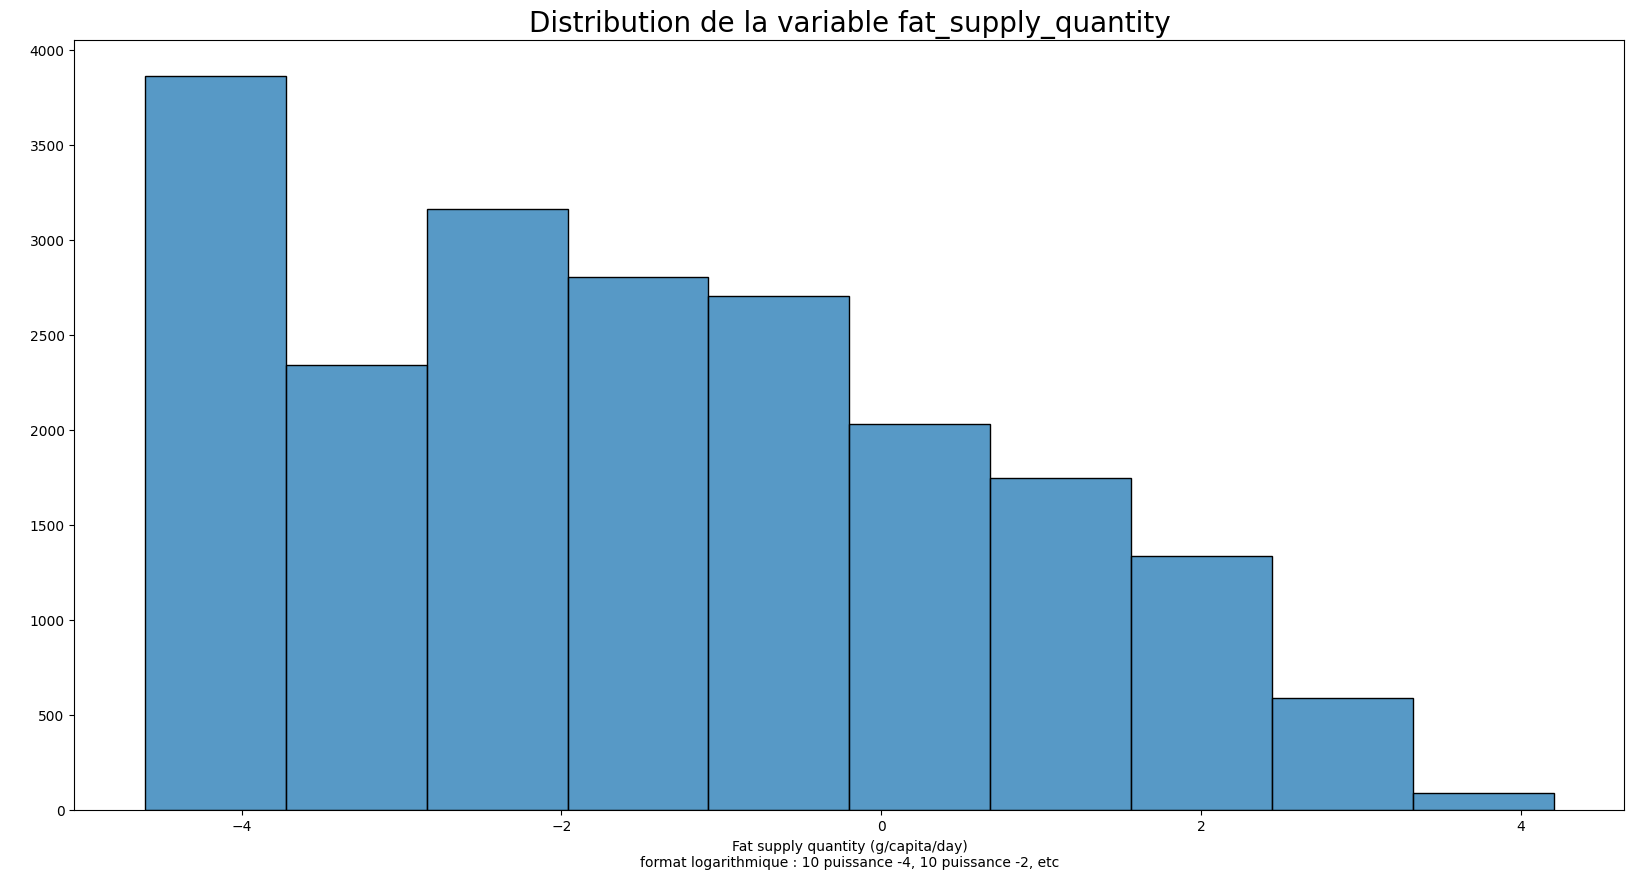

C:\Users\Thibaut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


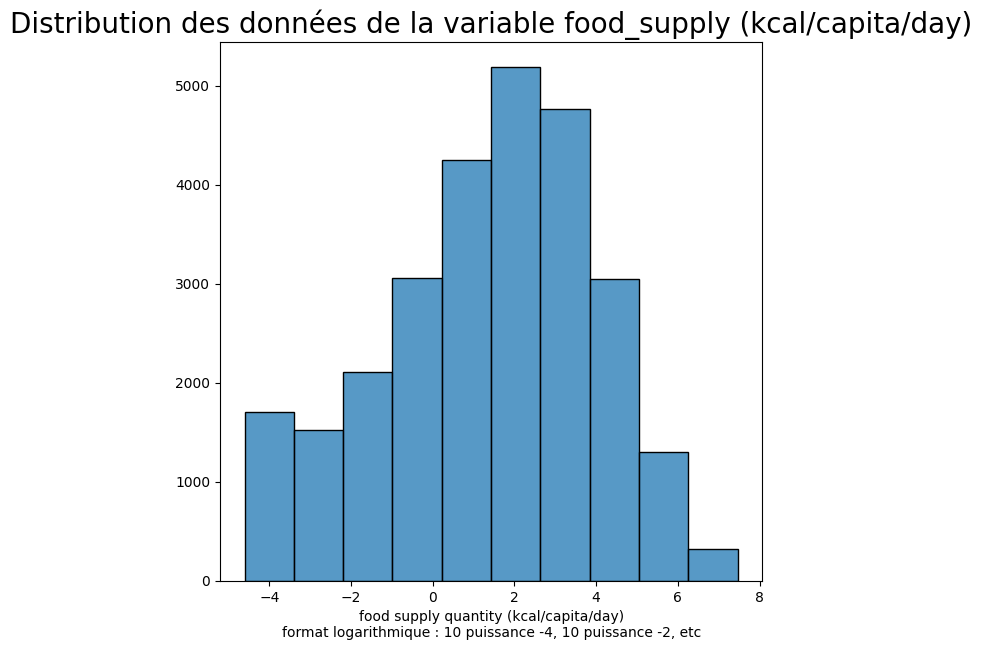

C:\Users\Thibaut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


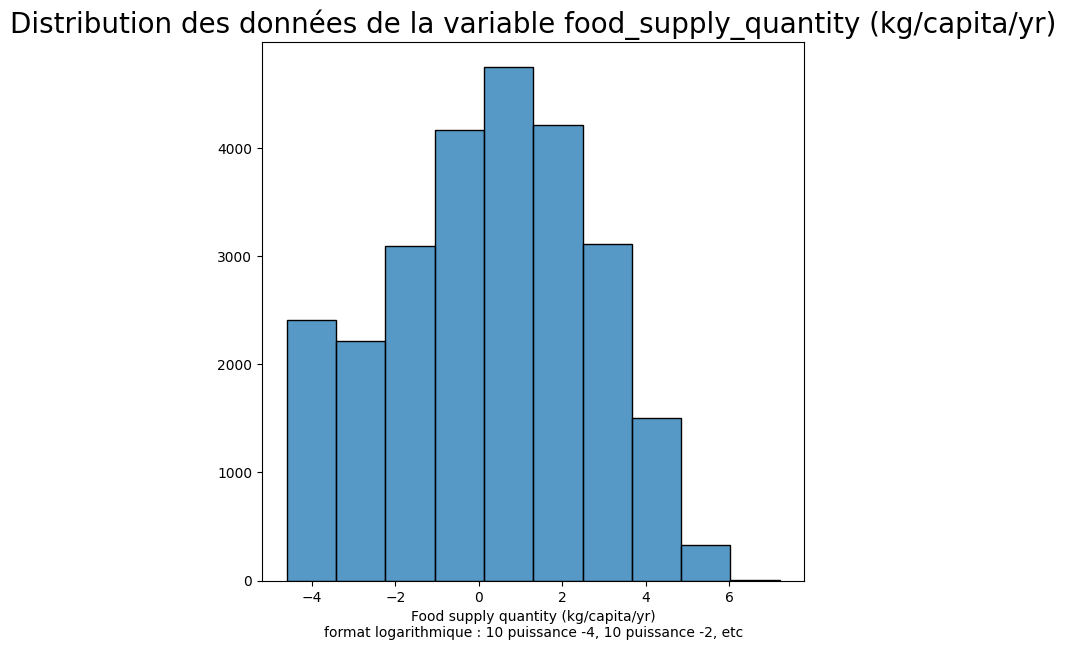

C:\Users\Thibaut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


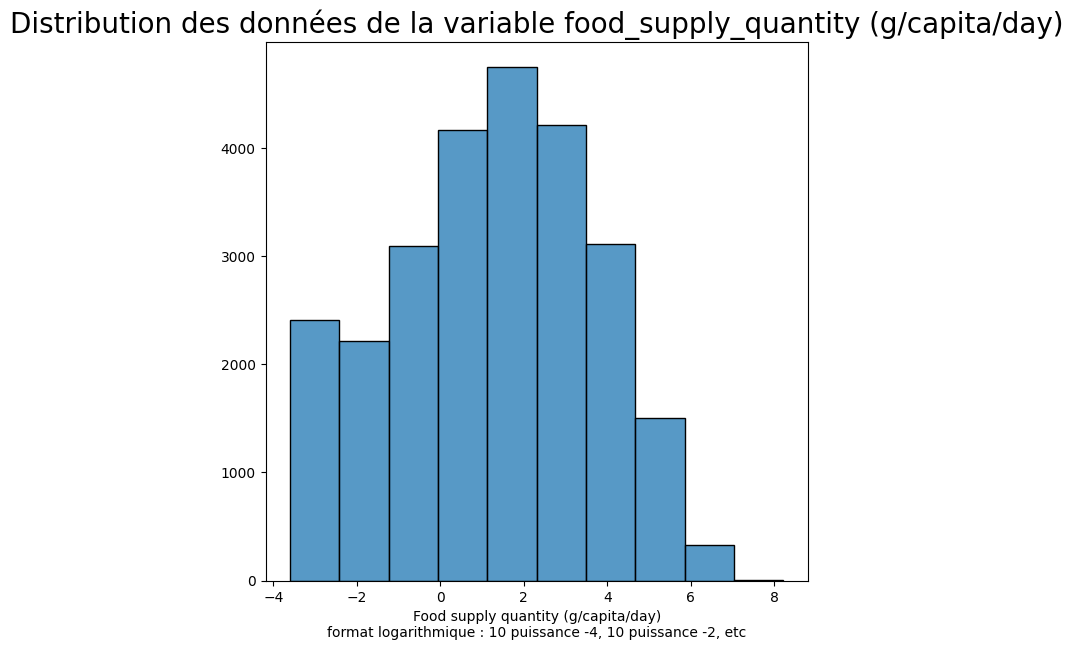

C:\Users\Thibaut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


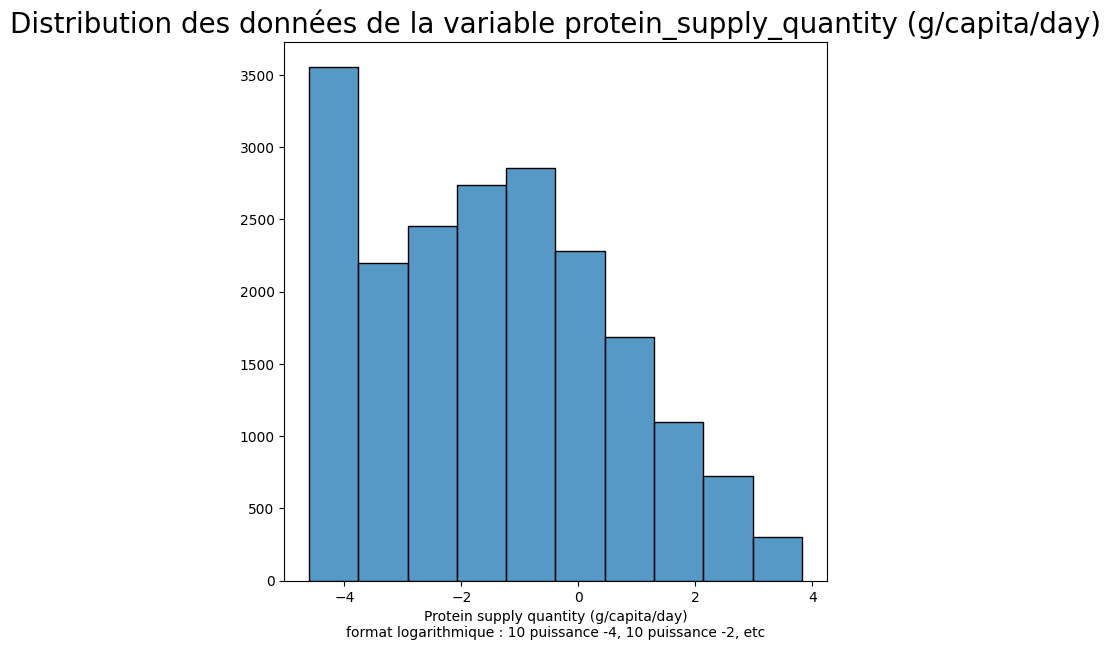

In [33]:
data = final_df["fat_supply_quantity_(g/capita/day)"]
data = np.log(data)
plt.figure(figsize=(20,10))
plt.grid(False)
plt.ylabel(" ")
plt.title("Distribution de la variable fat_supply_quantity", fontsize=20)
sns.histplot(data, bins=10)
plt.xlabel("Fat supply quantity (g/capita/day)\nformat logarithmique : 10 puissance -4, 10 puissance -2, etc")
plt.show()

# #plt.subplot(1,1,1)
# plt.figure(figsize=(7,7))
# plt.grid(False)
# plt.title("Distribution des données de la variable fat_su", fontsize=20)
# sns.histplot(data, bins=10)
# plt.xlabel("Fat supply quantity (g/capita/day)\nformat logarithmique : 10 puissance -4, 10 puissance -2, etc")
# plt.show()

# plt.subplot(1,2,2)
plt.figure(figsize=(7,7))
plt.ylabel(" ")
plt.grid(False)
plt.title("Distribution des données de la variable food_supply (kcal/capita/day)", fontsize=20)
sns.histplot(np.log(final_df["food_supply_(kcal/capita/day)"]), bins=10)
sns.color_palette("mako", as_cmap=True)
plt.xlabel("food supply quantity (kcal/capita/day)\nformat logarithmique : 10 puissance -4, 10 puissance -2, etc")
plt.show()

# plt.subplot(2,1,1)
plt.figure(figsize=(7,7))
plt.ylabel(" ")
plt.grid(False)
plt.title("Distribution des données de la variable food_supply_quantity (kg/capita/yr)", fontsize=20)
sns.histplot(np.log(final_df["food_supply_quantity_(kg/capita/yr)"]), bins=10)
plt.xlabel("Food supply quantity (kg/capita/yr)\nformat logarithmique : 10 puissance -4, 10 puissance -2, etc")
plt.show()


# plt.subplot(2,2,2)
plt.figure(figsize=(7,7))
plt.ylabel(" ")
plt.grid(False)
plt.title("Distribution des données de la variable food_supply_quantity (g/capita/day)", fontsize=20)
sns.histplot(np.log(final_df["food_supply_quantity_(g/capita/day)"]), bins=10)
plt.xlabel("Food supply quantity (g/capita/day)\nformat logarithmique : 10 puissance -4, 10 puissance -2, etc")
plt.show()


# plt.subplot(3,1,1)
plt.figure(figsize=(7,7))
plt.ylabel(" ")
plt.grid(False)
plt.title("Distribution des données de la variable protein_supply_quantity (g/capita/day)", fontsize=20)
sns.histplot(np.log(final_df["protein_supply_quantity_(g/capita/day)"]), bins=10)
plt.xlabel("Protein supply quantity (g/capita/day)\nformat logarithmique : 10 puissance -4, 10 puissance -2, etc")
plt.show()


#les chiffres en X sont des 10 puissance chiffre (ex -4 = 10 puissance - 4)



### 19) Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)

In [34]:
filter_2018 = final_df["year"] == 2018
ukraine = final_df["country"] == "Ukraine"
total_pop_ukraine_2018 = final_df[filter_2018 & ukraine]["pop_1000_hab"].unique()
print(f"Le total de la population ukrainienne en 2018 était de : {int(total_pop_ukraine_2018.item()*1000):,} millions d'habitants.")

Le total de la population ukrainienne en 2018 était de : 44,446,950 millions d'habitants.


### 20) Quels sont les 10 pays les plus peuplés ?

In [35]:
filter_2019 = final_df["year"] == 2019

countries_with_highest_pop = final_df[filter_2019].groupby(["country", "year"])["pop_1000_hab"].first().reset_index()
countries_with_highest_pop["pop_1000_hab"] = countries_with_highest_pop["pop_1000_hab"].values*1000
countries_with_highest_pop["pop_1000_hab"] = countries_with_highest_pop["pop_1000_hab"].astype(int)
countries_with_highest_pop = countries_with_highest_pop.rename(columns={"pop_1000_hab" : "total_population"})
countries_with_highest_pop_sorted = countries_with_highest_pop.sort_values(by="total_population", ascending=False)
countries_with_highest_pop_sorted.head(10)

,country,year,total_population
36,"China, mainland",2019,1421864030
77,India,2019,1383112050
176,United States of America,2019,334319670
78,Indonesia,2019,269582880
127,Pakistan,2019,223293280
22,Brazil,2019,211782880
123,Nigeria,2019,203304490
12,Bangladesh,2019,165516220
139,Russian Federation,2019,145742290
85,Japan,2019,125791680


### 21) Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ? Menez votre enquête et faites les corrections nécessaires en cas de problème. Contrôlez vos données grâce à ce site.

In [36]:
final_df_2018 = final_df[filtre_2018]
world_pop_2018 = final_df_2018.groupby("country")["pop_1000_hab"].first().sum()
print(f"La population mondiale en 2018 était de : {int(world_pop_2018*1000):,}")

La population mondiale en 2018 était de : 7,620,940,580


In [37]:
final_df_2019 = final_df[filter_2019]
world_pop_2019 = final_df_2019.groupby("country")["pop_1000_hab"].first().sum()
print(f"La population mondiale en 2019 était de : {int(world_pop_2019*1000):,}")

La population mondiale en 2019 était de : 7,716,661,460


### 22) Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

In [38]:
test = final_df.groupby(["country", "year"])["pop_1000_hab"].first().reset_index()
test = test.rename(columns={"year" : "index"})
test = test.pivot_table(index=["country"], columns="index", values="pop_1000_hab")
test = test.reset_index()
test["taux_croissance_pop_18_19"] = round((test[2019] - test[2018])/test[2018]*100, 2)
test.sort_values(by="taux_croissance_pop_18_19", ascending=False).head(5)

index,country,2018,2019,taux_croissance_pop_18_19
162,Syrian Arab Republic,19333.46,20098.25,3.96
122,Niger,22577.06,23443.39,3.84
3,Angola,31273.53,32353.59,3.45
171,Uganda,41515.39,42949.08,3.45
31,Chad,15604.21,16126.87,3.35


### 23) Quel est le taux de croissance moyen en fonction de la zone géographique ?

In [39]:
test = final_df.groupby(["continent", "country_group", "country", "year"])["pop_1000_hab"].first().reset_index()
test = test.rename(columns={"year" : "index"})
test = test.pivot_table(index=["country", "continent", "country_group"], columns="index", values="pop_1000_hab")
test = test.reset_index()
test["taux_croissance_pop_18_19"] = round((test[2019] - test[2018])/test[2018]*100, 2)
test = test.groupby("continent")["taux_croissance_pop_18_19"].mean()
test = test.reset_index()
round(test.sort_values(by="taux_croissance_pop_18_19", ascending=False), 3)

,continent,taux_croissance_pop_18_19
0,Africa,2.262
4,Oceania,1.456
5,South America,1.323
1,Asia,1.288
3,North America,0.795
2,Europe,0.204


In [40]:
test = final_df.groupby(["country_group", "country", "year"])["pop_1000_hab"].first().reset_index()
test = test.rename(columns={"year" : "index"})
test = test.pivot_table(index=["country", "country_group"], columns="index", values="pop_1000_hab")
test = test.reset_index()
test["taux_croissance_pop_18_19"] = round((test[2019] - test[2018])/test[2018]*100, 2)
test = test.groupby("country_group")["taux_croissance_pop_18_19"].mean()
test = test.reset_index()
round(test.sort_values(by = "taux_croissance_pop_18_19", ascending=False), 3)

,country_group,taux_croissance_pop_18_19
6,Middle Africa,2.668
15,Sub-Saharan Africa,2.534
3,Eastern Africa,2.333
7,Northern Africa,1.673
2,Central Asia,1.648
13,Southern Asia,1.538
10,Oceania,1.456
12,Southern Africa,1.404
1,Central America,1.232
16,Western Asia,1.191


### 24) Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !

In [41]:
total_food_supply = final_df.groupby(["country", "year", "pop_1000_hab"])[["food_supply_(kcal/capita/day)", "food_supply_quantity_(kg/capita/yr)", "protein_supply_quantity_(g/capita/day)"]].sum()
total_food_supply = total_food_supply.reset_index()
total_food_supply["protein_supply_quantity_(g/capita/day)"] = round(total_food_supply["protein_supply_quantity_(g/capita/day)"] * 365 / 1000, 2)

total_food_supply["protein_total"] = (total_food_supply["protein_supply_quantity_(g/capita/day)"] * total_food_supply["pop_1000_hab"])
total_food_supply = total_food_supply.reset_index()

total_food_supply = total_food_supply.rename(columns={"protein_supply_quantity_(g/capita/day)" : "protein_supply_quantity_(kg/capita/yr)"})
total_food_supply

,index,country,year,pop_1000_hab,food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(kg/capita/yr),protein_total
0,0,Afghanistan,2018,36686.78,2265.23,385.31,22.97,8.426953e+05
1,1,Afghanistan,2019,37769.50,2228.38,400.14,22.25,8.403714e+05
2,2,Albania,2018,2877.01,3352.22,1188.20,42.08,1.210646e+05
3,3,Albania,2019,2873.88,3374.75,1248.11,43.21,1.241804e+05
4,4,Algeria,2018,41927.01,3392.18,842.24,34.50,1.446482e+06
...,...,...,...,...,...,...,...,...
359,359,Yemen,2019,31546.69,2029.78,325.96,20.02,6.315647e+05
360,360,Zambia,2018,17835.89,2261.58,425.93,19.10,3.406655e+05
361,361,Zambia,2019,18380.48,2243.06,464.32,17.03,3.130196e+05
362,362,Zimbabwe,2018,15052.18,2065.63,329.38,19.84,2.986353e+05


In [42]:
testy = total_food_supply.sort_values(by="food_supply_(kcal/capita/day)", ascending=True)
testy.head(10)

,index,country,year,pop_1000_hab,food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(kg/capita/yr),protein_total
49,49,Burundi,2019,11874.84,1779.96,519.26,14.92,177172.6128
48,48,Burundi,2018,11493.47,1786.94,540.47,14.20,163207.2740
58,58,Central African Republic,2018,5094.78,1819.30,465.53,18.62,94864.8036
59,59,Central African Republic,2019,5209.32,1853.54,470.69,18.89,98404.0548
189,189,Lesotho,2019,2225.70,1986.63,440.74,18.88,42021.2160
358,358,Yemen,2018,30790.51,1993.76,301.51,19.07,587175.0257
199,199,Madagascar,2019,27533.13,1994.50,461.05,14.60,401983.6980
90,90,Democratic People's Republic of Korea,2018,25638.15,2003.83,465.53,21.02,538913.9130
198,198,Madagascar,2018,26846.54,2020.55,469.70,15.37,412631.3198
363,363,Zimbabwe,2019,15354.61,2024.55,321.36,19.69,302332.2709


### 25) En vous basant sur le résultat de la question précédente, calculez le ratio énergie/poids de chaque produit et pays. Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, calculez la moyenne de ce ratio pour chaque aliment.  Attention à bien gérer les valeurs égales à 0. Vérifiez la cohérence de votre calcul en comparant le résultat avec l’apport calorique d’un œuf.

In [43]:
# 1) ne pas prendre les valeurs 0
# 2) calcul du ratio 
# 3) moyenne ou médiane par produit avec un group by
ratio_df = final_df_2019

valeurs_zero = final_df_2019
valeurs_zero = ratio_df["food_supply_quantity_(g/capita/day)"] == 0.0
ratio_df[~valeurs_zero]

ratio_df["ratio"] = ratio_df["protein_supply_quantity_(g/capita/day)"] / ratio_df["food_supply_quantity_(g/capita/day)"]
ratio_df

ratio_df = ratio_df.groupby(["type", "item"])["ratio"].median()
ratio_df = ratio_df.reset_index()
ratio_df = ratio_df.sort_values(by="ratio", ascending=False)
ratio_df

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_2944\3925142141.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_df["ratio"] = ratio_df["protein_supply_quantity_(g/capita/day)"] / ratio_df["food_supply_quantity_(g/capita/day)"]


,type,item,ratio
39,vegetal,Cottonseed,0.365000
82,vegetal,Soyabeans,0.306600
71,vegetal,"Pulses, Other and products",0.237250
65,vegetal,Peas,0.222174
27,vegetal,Beans,0.215989
...,...,...,...
33,vegetal,"Citrus, Other",0.000000
36,vegetal,Coconut Oil,0.000000
50,vegetal,Maize Germ Oil,0.000000
14,animal,"Meat, Aquatic Mammals",NaN


In [44]:
# ex : un oeuf pèse 100g et ne contient que 25g de protéines
egg = ratio_df["item"] == "Eggs"
ratio_df[egg]

,type,item,ratio
8,animal,Eggs,0.113829


### 26) À l’instar de la question précédente, calculez le pourcentage de protéine de chaque aliment. Vérifiez votre résultat en le comparant avec l’apport en protéines d’un œuf.

In [45]:
ratio_df["pourcentage_calorie"] = round(ratio_df["ratio"] * 100,2)
ratio_df 

,type,item,ratio,pourcentage_calorie
39,vegetal,Cottonseed,0.365000,36.50
82,vegetal,Soyabeans,0.306600,30.66
71,vegetal,"Pulses, Other and products",0.237250,23.72
65,vegetal,Peas,0.222174,22.22
27,vegetal,Beans,0.215989,21.60
...,...,...,...,...
33,vegetal,"Citrus, Other",0.000000,0.00
36,vegetal,Coconut Oil,0.000000,0.00
50,vegetal,Maize Germ Oil,0.000000,0.00
14,animal,"Meat, Aquatic Mammals",NaN,NaN


### 27) Quels sont les 10 aliments les plus caloriques ?

In [46]:
aliments_les_plus_caloriques = ratio_df.sort_values(by="pourcentage_calorie", ascending=False)
aliments_les_plus_caloriques.head(10)

,type,item,ratio,pourcentage_calorie
39,vegetal,Cottonseed,0.365000,36.50
82,vegetal,Soyabeans,0.306600,30.66
71,vegetal,"Pulses, Other and products",0.237250,23.72
65,vegetal,Peas,0.222174,22.22
27,vegetal,Beans,0.215989,21.60
78,vegetal,Sesame seed,0.196854,19.69
15,animal,"Meat, Other",0.192781,19.28
57,vegetal,"Oilcrops, Other",0.192105,19.21
18,animal,Mutton & Goat Meat,0.167081,16.71
22,animal,Poultry Meat,0.165292,16.53


#### Aliments (végétaux) les plus caloriques

In [47]:
vege = ratio_df["type"] == "vegetal"
aliments_les_plus_caloriques[vege].head(10)

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_2944\2015332684.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aliments_les_plus_caloriques[vege].head(10)


,type,item,ratio,pourcentage_calorie
39,vegetal,Cottonseed,0.365000,36.50
82,vegetal,Soyabeans,0.306600,30.66
71,vegetal,"Pulses, Other and products",0.237250,23.72
65,vegetal,Peas,0.222174,22.22
27,vegetal,Beans,0.215989,21.60
78,vegetal,Sesame seed,0.196854,19.69
57,vegetal,"Oilcrops, Other",0.192105,19.21
46,vegetal,Groundnuts,0.159688,15.97
88,vegetal,Sunflower seed,0.156429,15.64
67,vegetal,Pimento,0.131720,13.17


#### Aliments animaliers les plus caloriques

In [48]:
aliments_les_plus_caloriques[~vege].head(10)

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_2944\2953827394.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aliments_les_plus_caloriques[~vege].head(10)


,type,item,ratio,pourcentage_calorie
15,animal,"Meat, Other",0.192781,19.28
18,animal,Mutton & Goat Meat,0.167081,16.71
22,animal,Poultry Meat,0.165292,16.53
19,animal,"Offals, Edible",0.153429,15.34
2,animal,Bovine Meat,0.150704,15.07
4,animal,Cephalopods,0.149868,14.99
21,animal,Pigmeat,0.139652,13.97
8,animal,Eggs,0.113829,11.38
20,animal,Pelagic Fish,0.113479,11.35
13,animal,"Marine Fish, Other",0.106609,10.66


### 28) Quels sont les 10 aliments les plus riches en protéines ?

In [49]:
df_protein = final_df.groupby(["type", "item"])["protein_supply_quantity_(g/capita/day)"].max()
df_protein = df_protein.reset_index()
df_protein = df_protein.sort_values(by="protein_supply_quantity_(g/capita/day)", ascending=False)
df_protein.head(10)

,type,item,protein_supply_quantity_(g/capita/day)
95,vegetal,Wheat and products,45.85
16,animal,Milk - Excluding Butter,39.90
22,animal,Poultry Meat,36.86
74,vegetal,Rice and products,34.42
18,animal,Mutton & Goat Meat,29.96
20,animal,Pelagic Fish,27.34
21,animal,Pigmeat,26.78
51,vegetal,Maize and products,26.10
71,vegetal,"Pulses, Other and products",25.89
15,animal,"Meat, Other",23.23


#### Produits végétaux les plus riches en protéines

In [50]:
df_protein_veg = df_vegetal_products.groupby("item")["protein_supply_quantity_(g/capita/day)"].max()
df_protein_veg = df_protein_veg.reset_index()
df_protein_veg = df_protein_veg.sort_values(by="protein_supply_quantity_(g/capita/day)", ascending=False)
df_protein_veg.head(10)

NameError: name 'df_vegetal_products' is not defined

#### Produits animaliers les plus riches en protéines

In [ ]:
df_protein_veg = df_animal_products.groupby("item")["protein_supply_quantity_(g/capita/day)"].max()
df_protein_veg = df_protein_veg.reset_index()
df_protein_veg = df_protein_veg.sort_values(by="protein_supply_quantity_(g/capita/day)", ascending=False)
df_protein_veg.head(10)

,item,protein_supply_quantity_(g/capita/day)
16,Milk - Excluding Butter,39.90
22,Poultry Meat,36.86
18,Mutton & Goat Meat,29.96
20,Pelagic Fish,27.34
21,Pigmeat,26.78
15,"Meat, Other",23.23
2,Bovine Meat,21.77
19,"Offals, Edible",16.24
12,Freshwater Fish,9.42
8,Eggs,7.93


### 29) Créez une boîte à moustache de la quantité de nourriture par habitant en kcal par pays. Créez sur un même graphique un boxplot par zone géographique. Mettez un titre, changez les étiquettes des axes et changez la couleur en fonction de la zone géographique. Effectuez ce graphique en utilisant la librairie de visualisation matplotlib puis installez la librairie seaborn et refaites-le. Commentez les différences d’utilisation entre ces deux librairies.

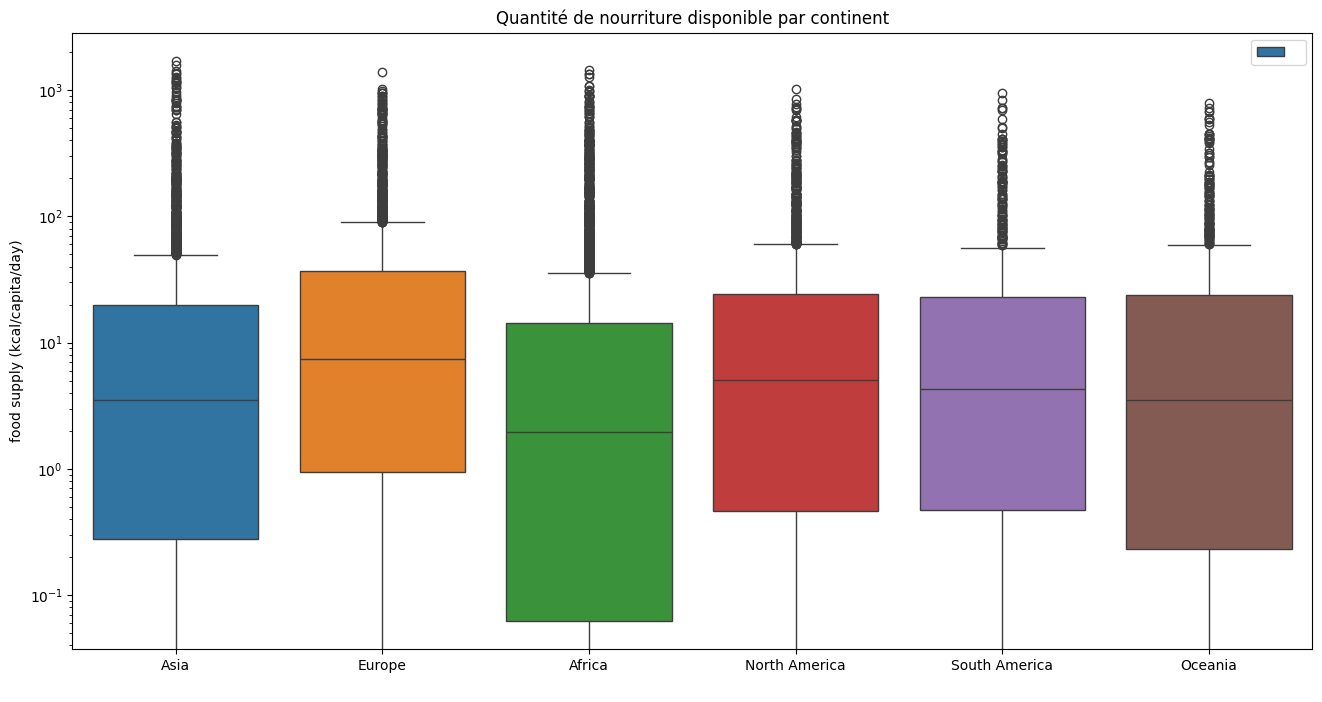

In [51]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='continent', y='food_supply_(kcal/capita/day)', data=final_df_2019, hue="continent")
plt.legend(" ")
plt.title("Quantité de nourriture disponible par continent")
plt.xlabel(" ")
plt.ylabel("food supply (kcal/capita/day)")
plt.yscale('log')

plt.show()

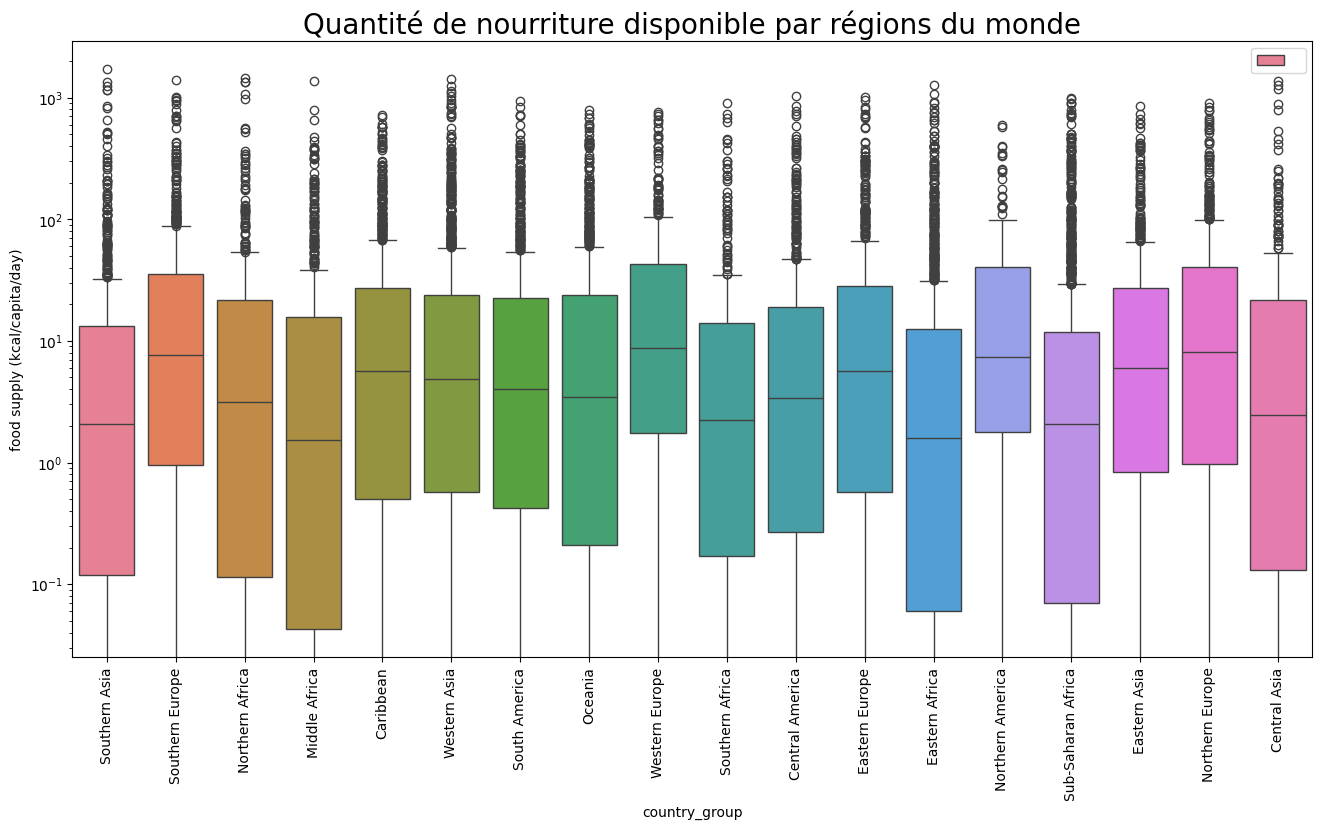

In [52]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='country_group', y='food_supply_(kcal/capita/day)', data=final_df_2019, hue="country_group")
plt.yscale('log')
plt.title("Quantité de nourriture disponible par régions du monde", fontsize=20)
plt.ylabel("food supply (kcal/capita/day)")
plt.xticks(rotation=90)
plt.legend(" ")
plt.show()

In [53]:
afrique = final_df["continent"] == "Africa"
afrique_df = final_df[afrique]

middleafrica = afrique_df["country_group"] == "Middle Africa"
middle_africa_countries = afrique_df[middleafrica]

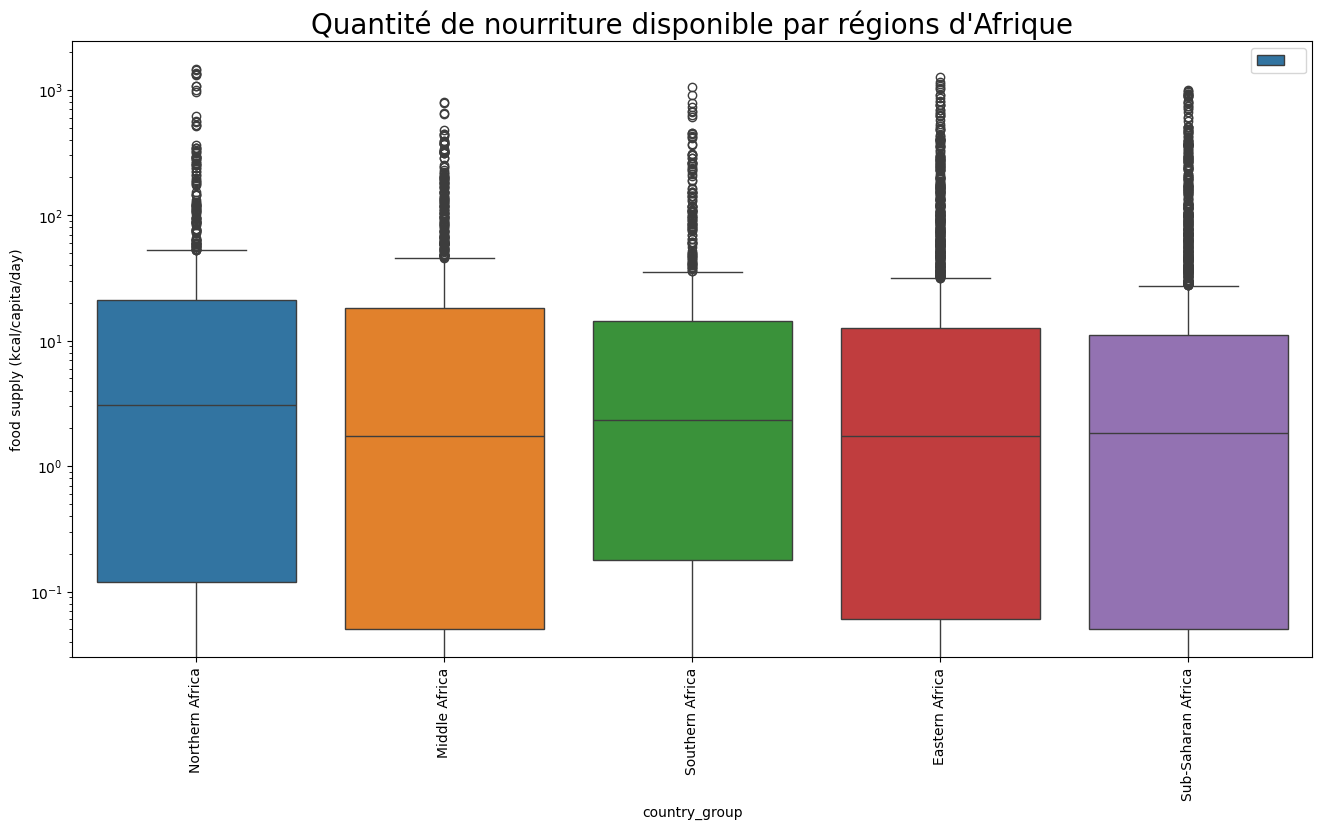

In [54]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='country_group', y='food_supply_(kcal/capita/day)', data=afrique_df, hue="country_group")
plt.yscale('log')
plt.title("Quantité de nourriture disponible par régions d'Afrique", fontsize=20)
plt.ylabel("food supply (kcal/capita/day)")
plt.xticks(rotation=90)
plt.legend(" ")
plt.show()

In [127]:
afrique_foodsupply = afrique_df.groupby(["country_group", "country", "year"])["food_supply_quantity_(kg/capita/yr)"].sum()
afrique_foodsupply = afrique_foodsupply.reset_index()
afrique_foodsupply = afrique_foodsupply.sort_values(by="food_supply_quantity_(kg/capita/yr)", ascending=False).head(7)
afrique_foodsupply


,country_group,country,year,food_supply_quantity_(kg/capita/yr)
21,Eastern Africa,Seychelles,2019,918.89
20,Eastern Africa,Seychelles,2018,894.57
72,Sub-Saharan Africa,Ghana,2019,889.23
71,Sub-Saharan Africa,Ghana,2018,888.44
44,Northern Africa,Algeria,2019,868.10
54,Northern Africa,Tunisia,2019,868.04
43,Northern Africa,Algeria,2018,842.24


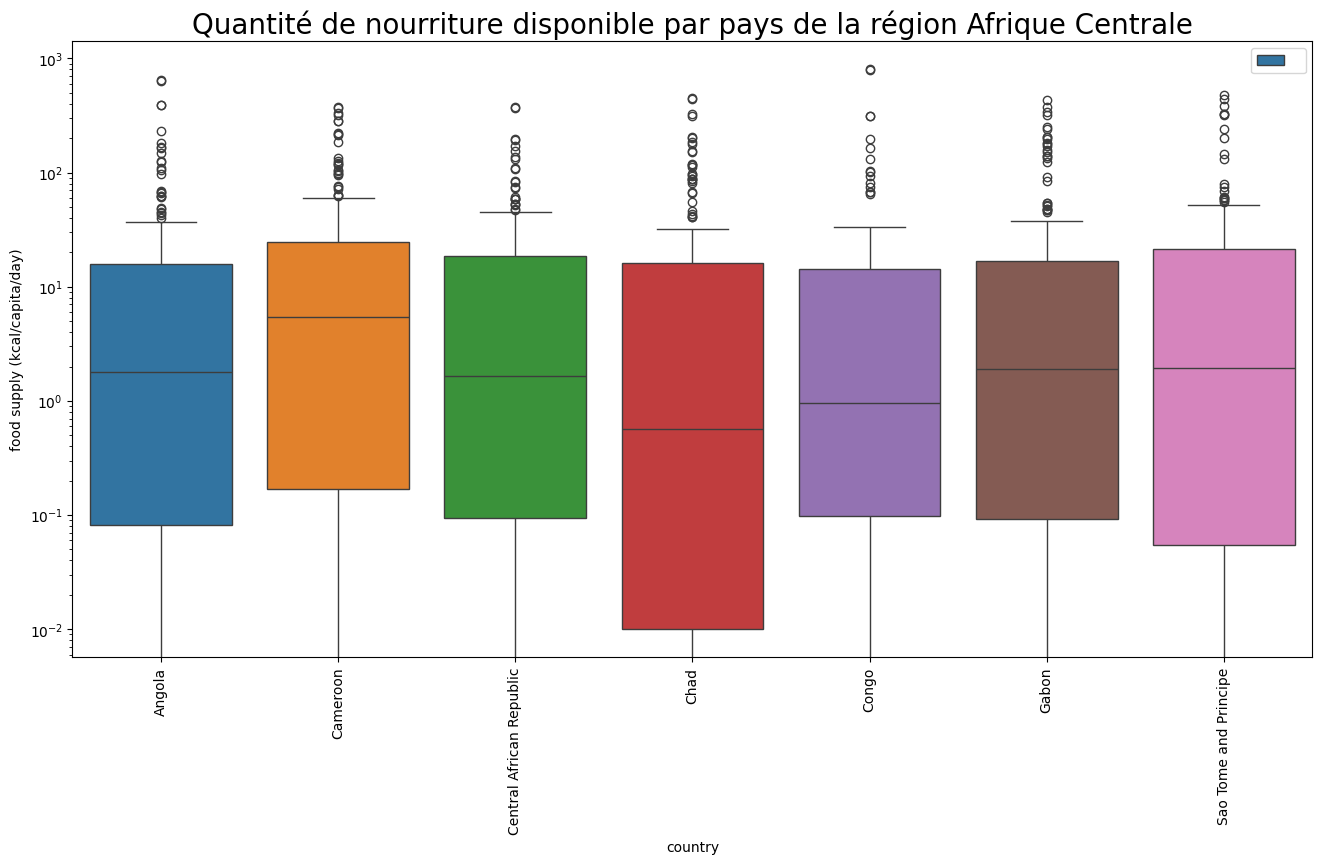

In [55]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='country', y='food_supply_(kcal/capita/day)', data=middle_africa_countries, hue="country")
plt.yscale('log')
plt.title("Quantité de nourriture disponible par pays de la région Afrique Centrale", fontsize=20)
plt.ylabel("food supply (kcal/capita/day)")
plt.xticks(rotation=90)
plt.legend(" ")
plt.show()

### 30) Avec la disponibilité alimentaire de produits végétaux combien d’être humains pourrait-on nourrir ?

In [56]:
vegetal_products = final_df_2019["type"] == "vegetal"
vegetal_products = final_df_2019[vegetal_products]
vegetal_products["food_supply_(kcal/capita/day)"] = vegetal_products["food_supply_(kcal/capita/day)"] * 365
vegetal_products = vegetal_products.rename(columns={"food_supply_(kcal/capita/day)" : "food_supply_(kcal/capita/yr)"})

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_2944\476033680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegetal_products["food_supply_(kcal/capita/day)"] = vegetal_products["food_supply_(kcal/capita/day)"] * 365


In [57]:
vegetal_products = vegetal_products.groupby(["item", "type"])["food_supply_(kcal/capita/yr)"].sum()
vegetal_products = vegetal_products.reset_index()
vegetal_products_supply = round(vegetal_products["food_supply_(kcal/capita/yr)"].sum())
print(f"Total food supply in kcal (in a year) for only vegetal products : {vegetal_products_supply:_}")
print(f"In 2019, there were {int(world_pop_2019*1000):,} humans on Earth.")
print(f"Knowing a human needs {2500*365:,} kcal in a year, we could have fed {vegetal_products_supply/(2500*365):,} humans with only vegetal products in a year.")

Total food supply in kcal (in a year) for only vegetal products : 157_410_469
In 2019, there were 7,716,661,460 humans on Earth.
Knowing a human needs 912,500 kcal in a year, we could have fed 172.50462356164383 humans with only vegetal products in a year.


In [58]:
print(f"In 2019, there were {int(world_pop_2019*1000):,} humans on Earth.")

year_kcal = 2500*365
print(f"Knowing a human needs {year_kcal:,} kcal in a year, we could have fed {round(int(world_pop_2019*1000)/year_kcal):,} humans with only vegetal products in a year.")

In 2019, there were 7,716,661,460 humans on Earth.
Knowing a human needs 912,500 kcal in a year, we could have fed 8,457 humans with only vegetal products in a year.


### 31) Avec Matplotlib, tracez l'évolution de la population (pop_1000_hab) de 2018 à 2019 pour les 5 pays les plus peuplés. Utilisez un graphique en barres pour chaque pays pour comparer les deux années.

In [59]:
top_5_countries_2019 = countries_with_highest_pop_sorted.head(5)
top_5_countries_2019

,country,year,total_population
36,"China, mainland",2019,1421864030
77,India,2019,1383112050
176,United States of America,2019,334319670
78,Indonesia,2019,269582880
127,Pakistan,2019,223293280


In [60]:
filter_2018 = final_df["year"] == 2018

countries_with_highest_pop = final_df[filter_2018].groupby(["country", "year"])["pop_1000_hab"].first().reset_index()
countries_with_highest_pop["pop_1000_hab"] = countries_with_highest_pop["pop_1000_hab"].values*1000
countries_with_highest_pop["pop_1000_hab"] = countries_with_highest_pop["pop_1000_hab"].astype(int)
countries_with_highest_pop = countries_with_highest_pop.rename(columns={"pop_1000_hab" : "total_population"})
countries_with_highest_pop_sorted = countries_with_highest_pop.sort_values(by="total_population", ascending=False)
top_5_countries_2018 = countries_with_highest_pop_sorted.head(5)
top_5_countries_2018

,country,year,total_population
34,"China, mainland",2018,1417069470
75,India,2018,1369003310
170,United States of America,2018,332140040
76,Indonesia,2018,267066840
123,Pakistan,2018,219731480


In [61]:
top_5_countries = pd.merge(top_5_countries_2018, top_5_countries_2019, on=["country", 'year', "total_population"], how="outer")
top_5_countries = top_5_countries.groupby(["country", "year"])["total_population"].first()
top_5_countries = top_5_countries.reset_index()
top_5_countries

,country,year,total_population
0,"China, mainland",2018,1417069470
1,"China, mainland",2019,1421864030
2,India,2018,1369003310
3,India,2019,1383112050
4,Indonesia,2018,267066840
5,Indonesia,2019,269582880
6,Pakistan,2018,219731480
7,Pakistan,2019,223293280
8,United States of America,2018,332140040
9,United States of America,2019,334319670


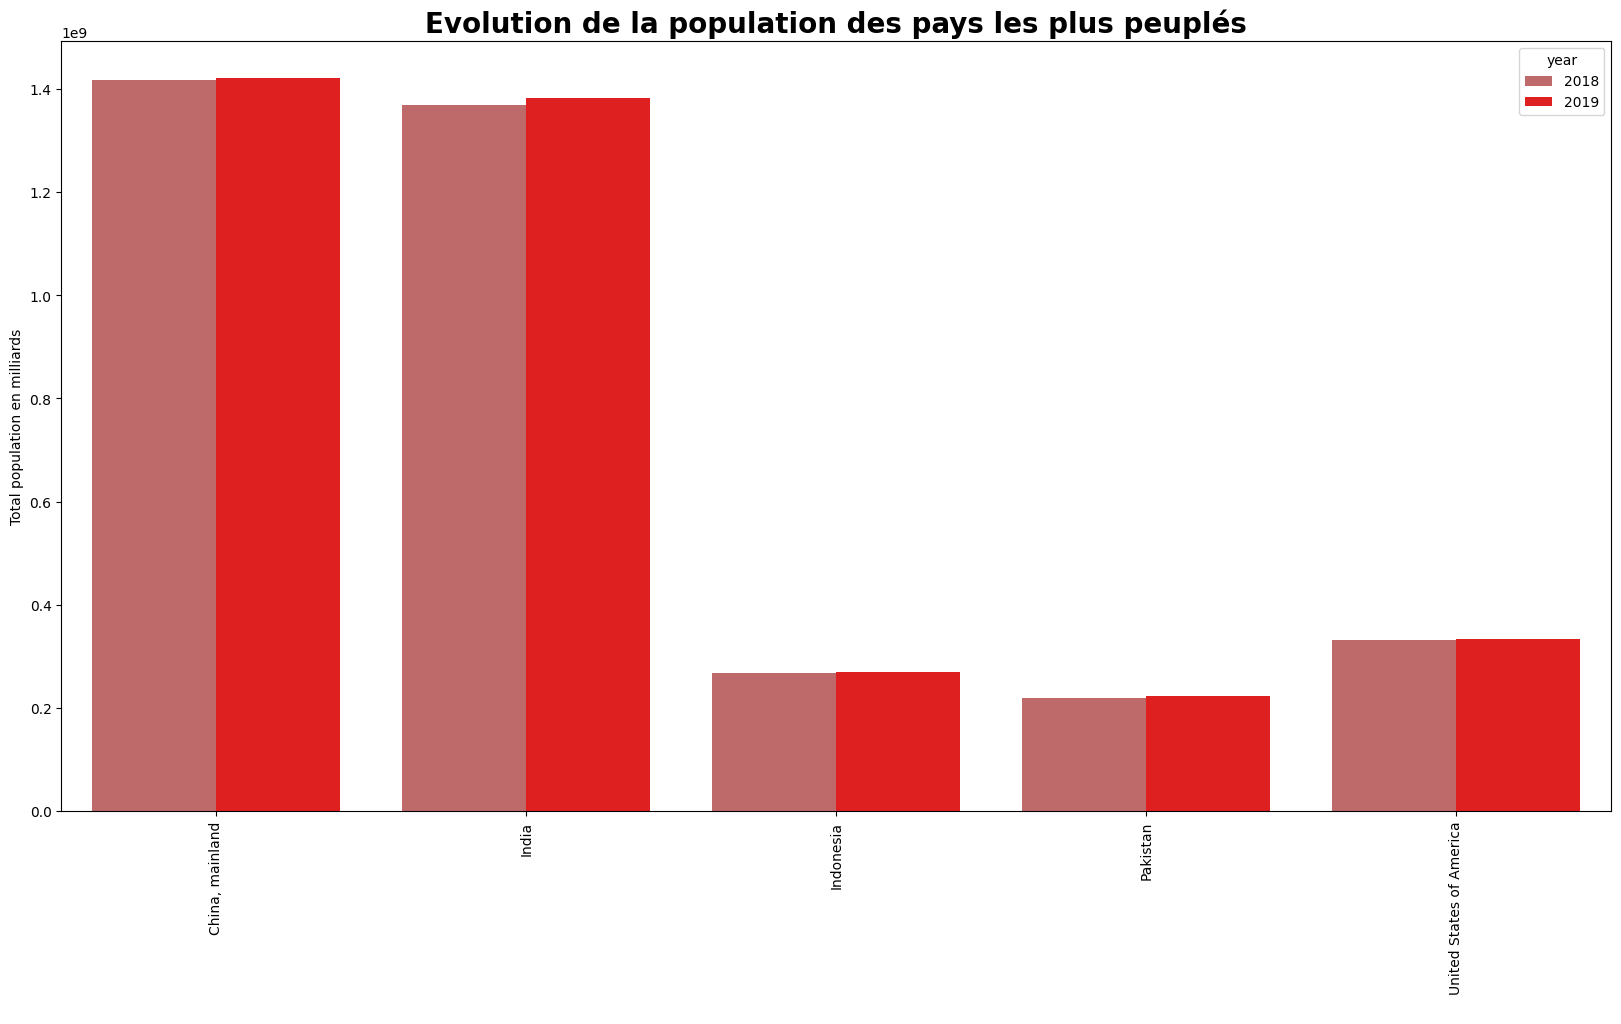

In [62]:
plt.figure(figsize=(20, 10))

custom_palette = {2018: "indianred", 2019: "red"}

plt.title('Evolution de la population des pays les plus peuplés', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population en milliards')
sns.barplot(x='country', y='total_population', data=top_5_countries, hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

In [63]:
final_df_2019.head(1)

evolution_continents = final_df.groupby(["continent", "country_group", "country", "year"])["pop_1000_hab"].first()
evolution_continents = evolution_continents.reset_index()
evolution_continents["pop_1000_hab"] = evolution_continents["pop_1000_hab"]
evolution_continents = evolution_continents.rename(columns={"pop_1000_hab" : "total_population"})
evolution_continents

,continent,country_group,country,year,total_population
0,Africa,Eastern Africa,Burundi,2018,11493.47
1,Africa,Eastern Africa,Burundi,2019,11874.84
2,Africa,Eastern Africa,Comoros,2018,776.31
3,Africa,Eastern Africa,Comoros,2019,790.99
4,Africa,Eastern Africa,Djibouti,2018,1057.20
...,...,...,...,...,...
300,South America,South America,Peru,2019,32824.86
301,South America,South America,Suriname,2018,593.72
302,South America,South America,Suriname,2019,600.30
303,South America,South America,Uruguay,2018,3427.04


In [64]:
abc = evolution_continents.groupby(["continent", "country", "year"])["total_population"].sum()
abc = abc.reset_index()
abc = abc.groupby(["continent", "year"])["total_population"].sum()
abc = abc.reset_index()
abc 

,continent,year,total_population
0,Africa,2018,1091506.53
1,Africa,2019,1128369.73
2,Asia,2018,2201818.12
3,Asia,2019,2231513.08
4,Europe,2018,511835.29
5,Europe,2019,512213.65
6,North America,2018,248848.33
7,North America,2019,251318.32
8,Oceania,2018,41936.99
9,Oceania,2019,42689.92


In [65]:
abcde = abc.pivot_table(index="continent", columns="year", values="total_population")
abcde = abcde.reset_index()
abcde["diff"] = (abcde[2019] - abcde[2018]) * 1000
abcde["percentage"] = abcde[2019] * 100 / abcde[2018]
abcde 

year,continent,2018,2019,diff,percentage
0,Africa,1091506.53,1128369.73,36863200.0,103.377277
1,Asia,2201818.12,2231513.08,29694960.0,101.348656
2,Europe,511835.29,512213.65,378360.0,100.073922
3,North America,248848.33,251318.32,2469990.0,100.992568
4,Oceania,41936.99,42689.92,752930.0,101.795384
5,South America,383027.81,387281.39,4253580.0,101.110515


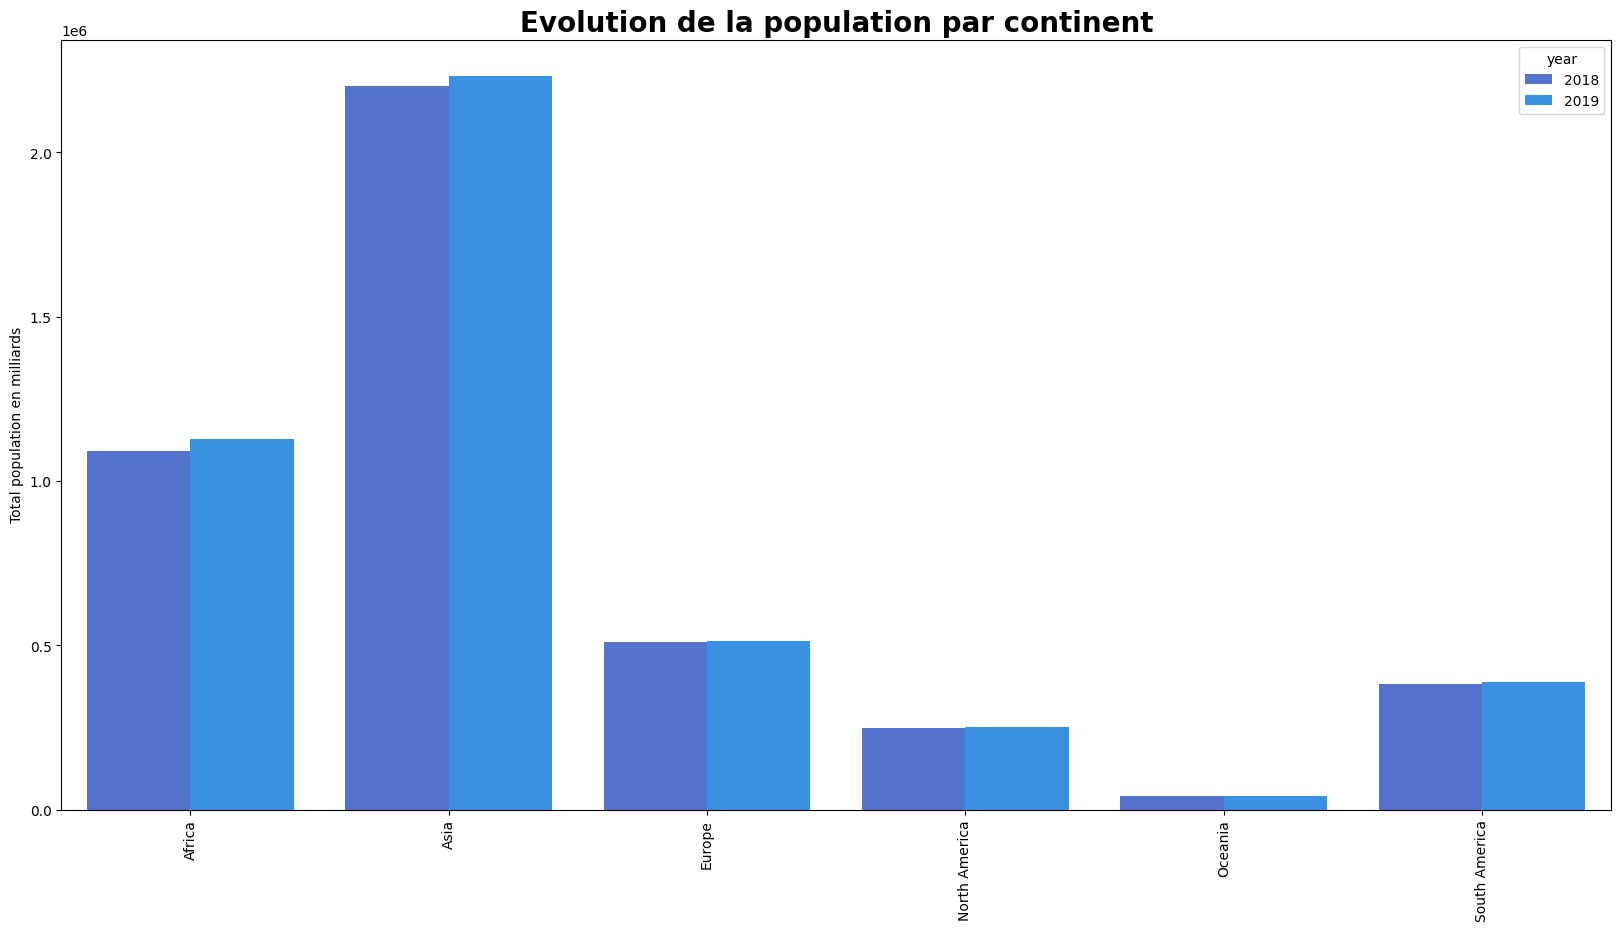

In [66]:
plt.figure(figsize=(20, 10))

custom_palette = {2018: "royalblue", 2019: "dodgerblue"}

plt.title('Evolution de la population par continent', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population en milliards')
sns.barplot(x='continent', y='total_population', data=abc, hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

In [67]:
abcd = final_df.groupby(["continent", "year"])["pop_1000_hab"].sum()
abcd = abcd.reset_index()
# abcd["pop_1000_hab"] = abcd["pop_1000_hab"] * 1000
abcd 

,continent,year,pop_1000_hab
0,Africa,2018,9.346020e+07
1,Africa,2019,9.657956e+07
2,Asia,2018,2.329619e+08
3,Asia,2019,2.357400e+08
4,Europe,2018,4.050642e+07
5,Europe,2019,4.108534e+07
6,North America,2018,2.096584e+07
7,North America,2019,2.123291e+07
8,Oceania,2018,3.533021e+06
9,Oceania,2019,3.601308e+06


In [144]:
summ = evolution_continents.groupby(["continent", "country", "country_group", "year"])["total_population"].sum()
summ = summ.reset_index()
africaaa = summ["continent"] == "Africa"
europee = summ["continent"] == "Europe"
# pays_les_plus_peuples_afrique = summ[africaaa].sort_values(by="total_population", ascending=False).head(6)
# pays_les_plus_peuples_afrique["total_population"] = pays_les_plus_peuples_afrique["total_population"]* 1000
# pays_les_plus_peuples_afrique

pays_les_plus_peuples_afrique = summ[europee].sort_values(by="total_population", ascending=False).head(6)
pays_les_plus_peuples_afrique["total_population"] = pays_les_plus_peuples_afrique["total_population"]* 1000
pays_les_plus_peuples_afrique

,continent,country,country_group,year,total_population
175,Europe,Germany,Western Europe,2019,83148000
174,Europe,Germany,Western Europe,2018,82896000
173,Europe,France,Western Europe,2019,64399000
172,Europe,France,Western Europe,2018,64277000
184,Europe,Italy,Southern Europe,2018,59877000
185,Europe,Italy,Southern Europe,2019,59727000


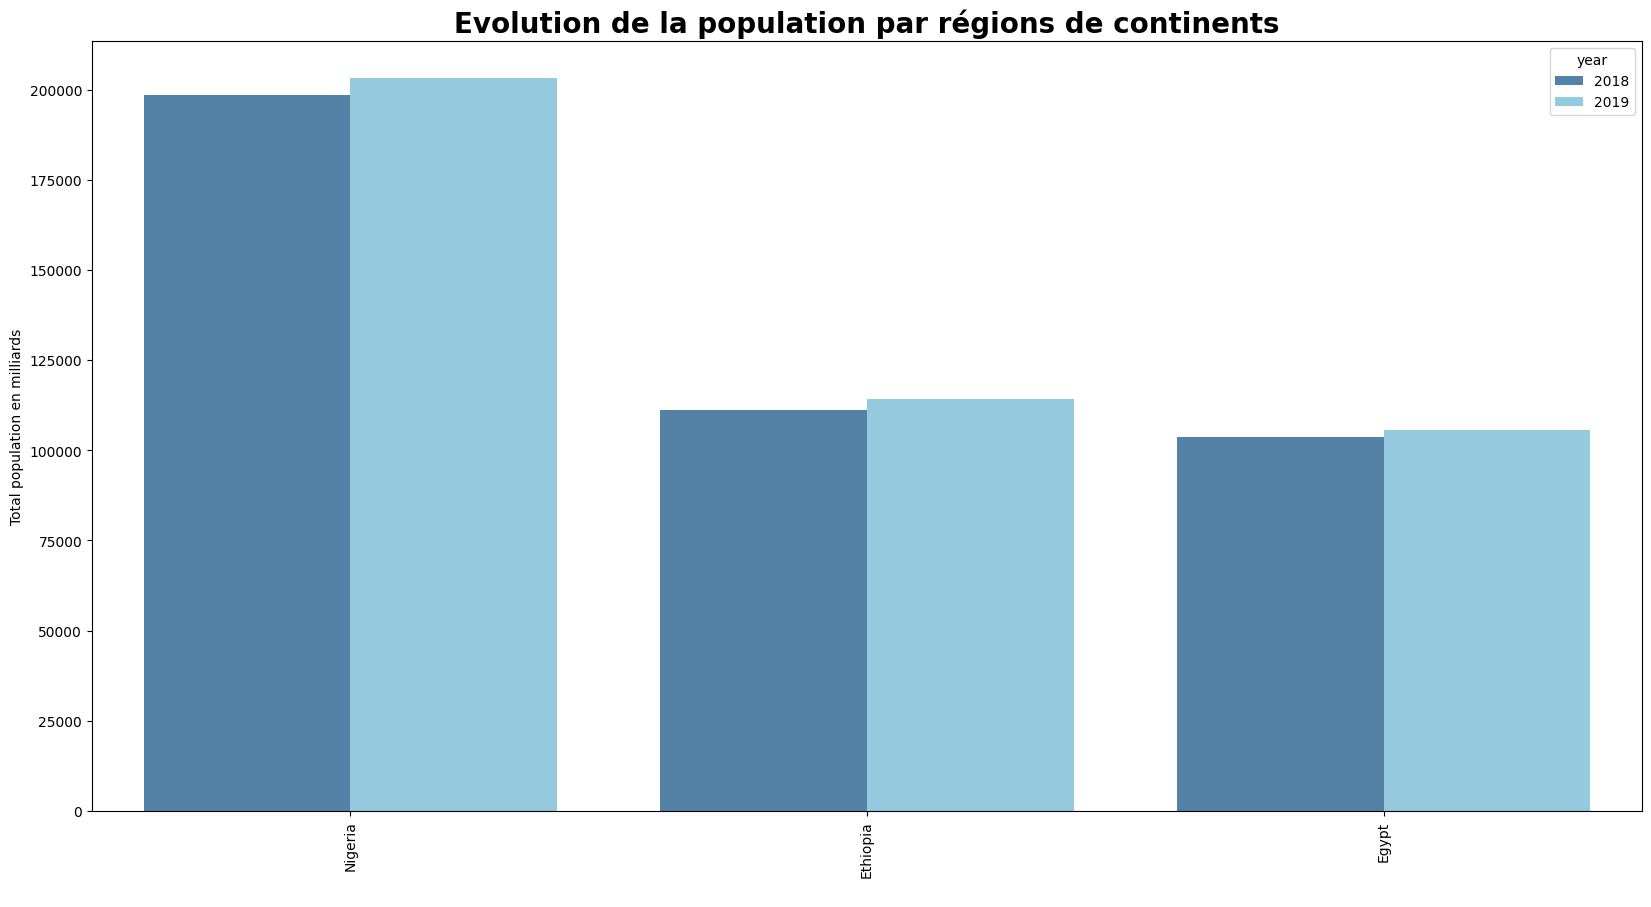

In [110]:
plt.figure(figsize=(20, 10))

custom_palette = {2018 : "steelblue", 2019: "skyblue"}

plt.title('Evolution de la population par régions de continents', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population en milliards')
sns.barplot(x='country', y='total_population', data=pays_les_plus_peuples_afrique , hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

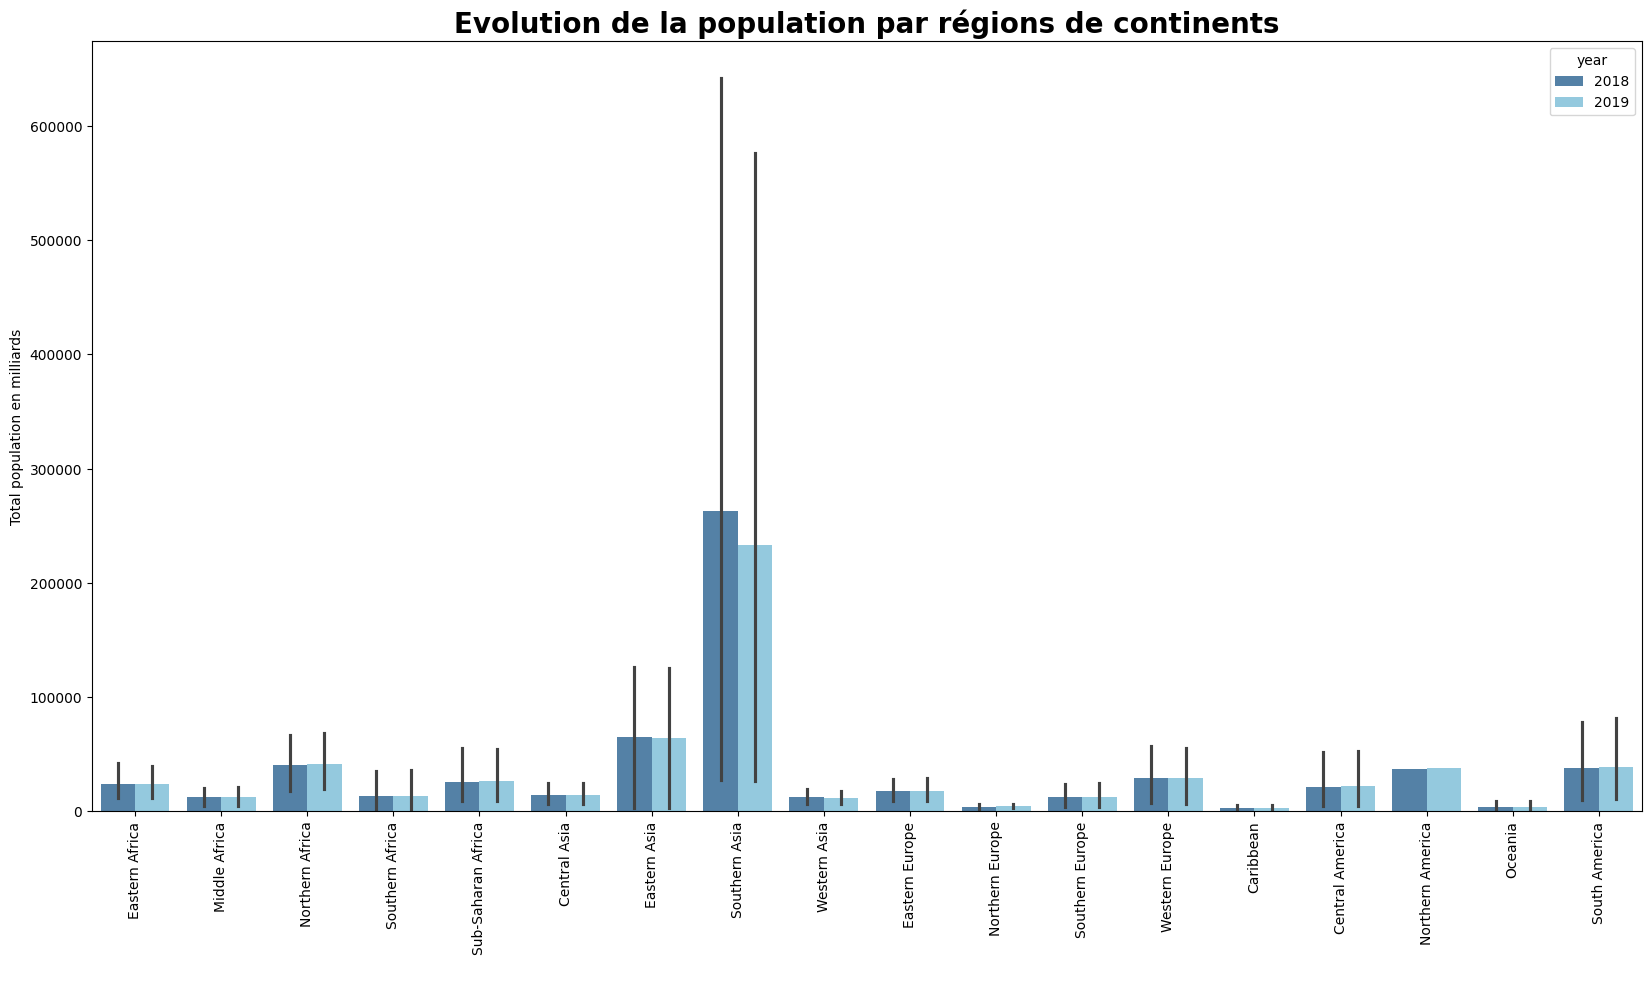

In [69]:
plt.figure(figsize=(20, 10))

custom_palette = {2018 : "steelblue", 2019: "skyblue"}

plt.title('Evolution de la population par régions de continents', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population en milliards')
sns.barplot(x='country_group', y='total_population', data=evolution_continents, hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

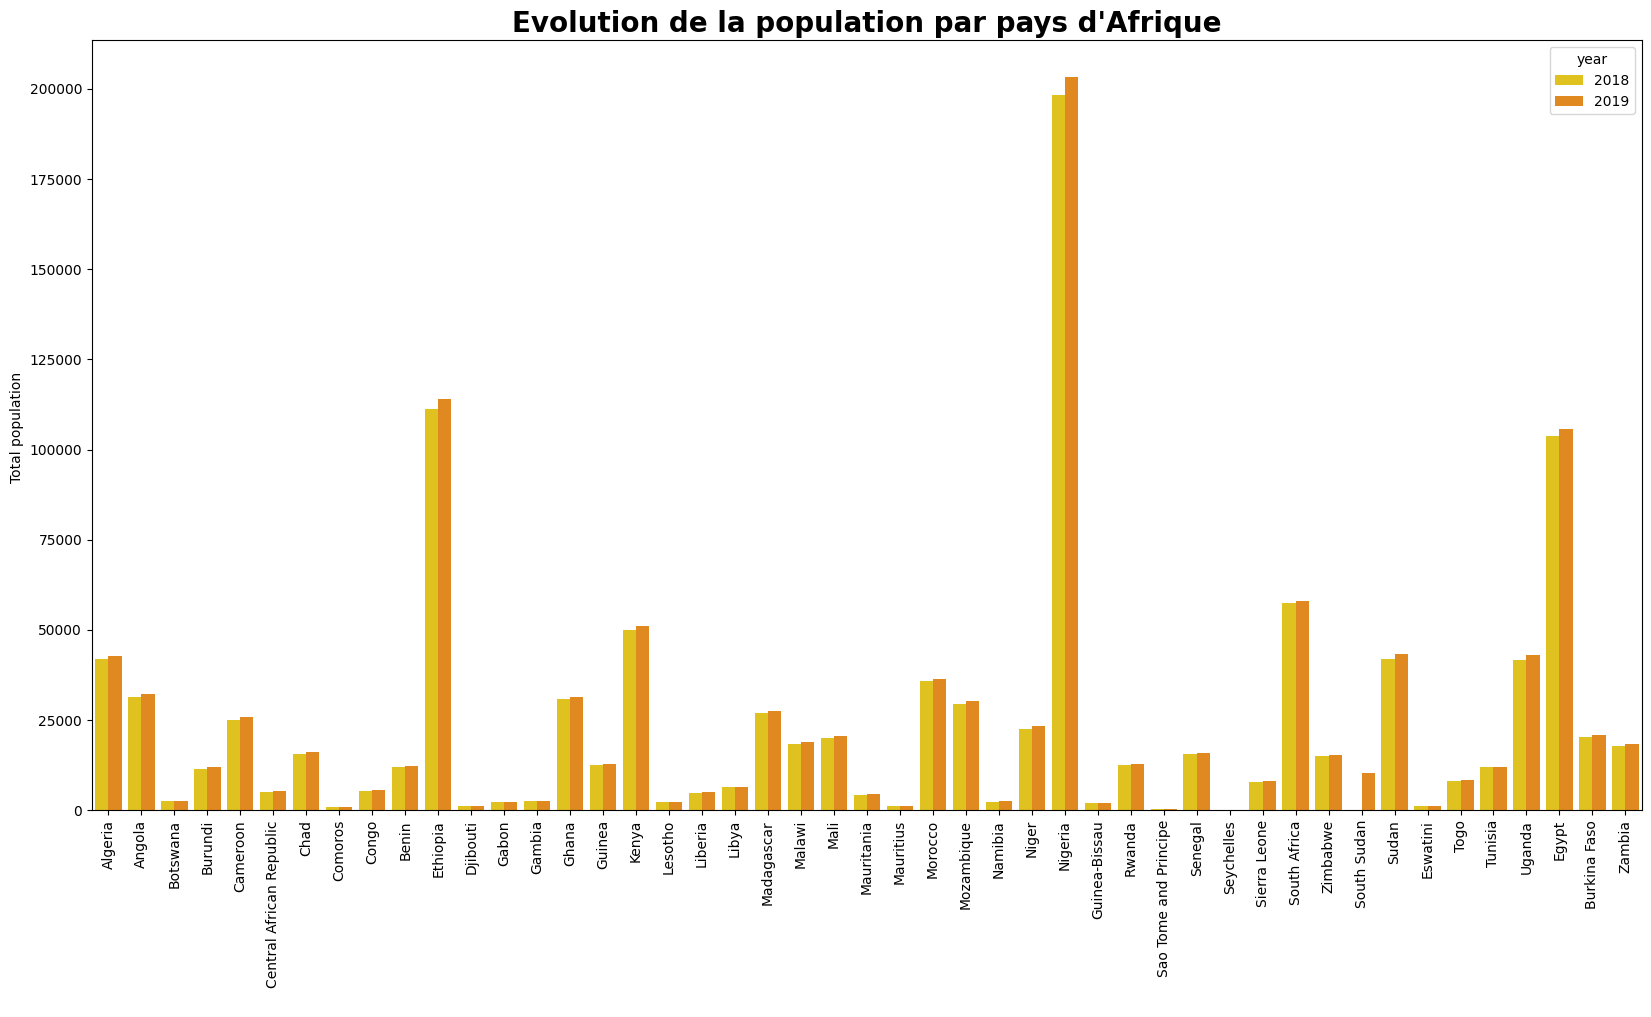

In [70]:
plt.figure(figsize=(20, 10))

custom_palette = {2018 : "gold", 2019: "darkorange"}

plt.title("Evolution de la population par pays d'Afrique", fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population ')
sns.barplot(x='country', y='pop_1000_hab', data=afrique_df, hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

In [71]:
# QUELS SONT LES PAYS OU LA POP 2019 EST MOINS ELEVEE QUE CELLE DE 2018 ?

test_pop = final_df.groupby(["country", "year", "continent", "country_group"])["pop_1000_hab"].first().reset_index()
test_pop = test_pop.pivot_table(index=["country", "country_group", "continent"], columns="year", values="pop_1000_hab")
test_pop = test_pop.reset_index()
test_pop["pourcentage_pop"] = test_pop[2019] * 100 / test_pop[2018]
test_pop

pays_pop_inferieure = test_pop["pourcentage_pop"] < 100.0
liste_population_inf = test_pop[pays_pop_inferieure]
liste_population_inf = liste_population_inf.groupby(["country", "country_group", "continent", 2018, 2019])["pourcentage_pop"].first()
liste_population_inf = liste_population_inf.reset_index()
liste_population_inf.sort_values(by="pourcentage_pop", ascending=True)

,country,country_group,continent,2018,2019,pourcentage_pop
14,Lebanon,Western Asia,Asia,5950.84,5781.91,97.161241
3,Bosnia and Herzegovina,Southern Europe,Europe,3400.13,3360.71,98.840633
13,Latvia,Northern Europe,Europe,1935.63,1916.56,99.014791
15,Lithuania,Northern Europe,Europe,2876.13,2849.08,99.059500
4,Bulgaria,Eastern Europe,Europe,7117.43,7052.53,99.088154
5,Croatia,Southern Europe,Europe,4160.48,4129.75,99.261383
1,Armenia,Western Asia,Asia,2836.56,2820.60,99.437347
9,Greece,Southern Europe,Europe,10633.27,10574.02,99.442787
22,Ukraine,Eastern Europe,Europe,44446.95,44211.10,99.469367
21,Serbia,Southern Europe,Europe,7433.82,7401.06,99.559311


### 32) Récupérer d’une source externe le PIB par habitant et calculer le coefficient de corrélation de pearson entre le PIB/hab et la disponibilité alimentaire par habitant.

In [72]:
df_pib = pd.read_csv("bbe61ec1-01e2-43eb-af5a-c251ec101733_Data.csv")
df_pib = df_pib[["Country Name", "2019 [YR2019]"]]
df_pib = df_pib.rename(columns={"Country Name" : "country", "2019 [YR2019]" : "PIB"})
df_pib = df_pib.dropna()

In [73]:
df_pib_merge = pd.merge(final_df_2019, df_pib, on="country", how="outer")
df_pib_merge['PIB'] = pd.to_numeric(df_pib_merge['PIB'], errors='coerce')
df_pib_merge = df_pib_merge.dropna()
df_pib_merge = df_pib_merge.fillna(0)


df_pib_merge["PIB_par_hab"] = df_pib_merge["PIB"] / (df_pib_merge["pop_1000_hab"]* 100)

df_pib_merge = df_pib_merge.groupby(["country", "food_supply_quantity_(kg/capita/yr)"])[["PIB", "PIB_par_hab"]].first()
df_pib_merge = df_pib_merge.reset_index()

df_pib_merge = df_pib_merge.groupby(["country", "PIB", "PIB_par_hab"])["food_supply_quantity_(kg/capita/yr)"].sum()
df_pib_merge = df_pib_merge.reset_index()
df_pib_merge 

,country,PIB,PIB_par_hab,food_supply_quantity_(kg/capita/yr)
0,Afghanistan,1.890450e+10,5005.229675,398.64
1,Albania,1.540183e+10,53592.446729,1246.24
2,Algeria,1.717603e+11,40219.834196,866.79
3,Angola,6.930911e+10,21422.386247,612.72
4,Antigua and Barbuda,1.675404e+09,181871.874045,778.01
...,...,...,...,...
139,Uruguay,6.204859e+10,180983.562697,865.72
140,Uzbekistan,6.028350e+10,18280.497046,1000.28
141,Vanuatu,9.365263e+08,30766.303141,772.29
142,Zambia,2.330867e+10,12681.207336,463.68


In [74]:
# Afficher spécifiquement le coefficient de corrélation entre Variable1 et Variable2
pearson_coefficient = df_pib_merge['PIB_par_hab'].corr(df_pib_merge['food_supply_quantity_(kg/capita/yr)'])
print(f"Le coef de corrélation de Pearson entre le PIB/hab de chaque pays et leur disponibilité alimentaire est : {round(pearson_coefficient, 4)}")

Le coef de corrélation de Pearson entre le PIB/hab de chaque pays et leur disponibilité alimentaire est : 0.5743


### BONUS : PERSONNES SOUS NUTRIES

In [75]:
df_securite_alimentaire = pd.read_csv("FAOSTAT_data_en_11-17-2023.csv")
df_securite_alimentaire = df_securite_alimentaire[["Area", "Year", "Value"]]
df_securite_alimentaire = df_securite_alimentaire.rename(columns={"Area" : "country", "Year" : "year", "Value" : "undernourished_people"})

df_securite_alimentaire = df_securite_alimentaire.fillna(0)

df_securite_alimentaire = df_securite_alimentaire.replace("<0.1", 0)

df_securite_alimentaire["undernourished_people"] = df_securite_alimentaire["undernourished_people"].astype(float)
df_securite_alimentaire["undernourished_people"] = df_securite_alimentaire['undernourished_people']*1000000

df_securite_alimentaire["year"] = df_securite_alimentaire["year"].replace("2017-2019", 2018)
df_securite_alimentaire["year"] = df_securite_alimentaire["year"].replace("2018-2020", 2019)


df_securite_alimentaire["undernourished_people"] = df_securite_alimentaire["undernourished_people"].astype(int)
df_securite_alimentaire

,country,year,undernourished_people
0,Afghanistan,2018,8800000
1,Afghanistan,2019,10200000
2,Albania,2018,100000
3,Albania,2019,100000
4,Algeria,2018,0
...,...,...,...
402,Yemen,2019,12300000
403,Zambia,2018,5100000
404,Zambia,2019,5400000
405,Zimbabwe,2018,5800000


In [76]:
evolution_continents["total_population"] = evolution_continents["total_population"].astype(int)
evolution_continents

,continent,country_group,country,year,total_population
0,Africa,Eastern Africa,Burundi,2018,11493
1,Africa,Eastern Africa,Burundi,2019,11874
2,Africa,Eastern Africa,Comoros,2018,776
3,Africa,Eastern Africa,Comoros,2019,790
4,Africa,Eastern Africa,Djibouti,2018,1057
...,...,...,...,...,...
300,South America,South America,Peru,2019,32824
301,South America,South America,Suriname,2018,593
302,South America,South America,Suriname,2019,600
303,South America,South America,Uruguay,2018,3427


In [140]:
df_sous_nutrition = pd.merge(evolution_continents, df_securite_alimentaire, on=["country", "year"], how="outer")
valeurs_z = df_sous_nutrition["undernourished_people"] == 0
df_sous_nutrition = df_sous_nutrition[~valeurs_z]
df_sous_nutrition["undernourished_people_percent"] = abs((df_sous_nutrition["total_population"]*1000 - df_sous_nutrition["undernourished_people"])*100 / (df_sous_nutrition["total_population"]*1000))
df_sous_nutrition = df_sous_nutrition.dropna()
df_sous_nutrition = df_sous_nutrition.sort_values(by="undernourished_people_percent", ascending=False)
df_sous_nutrition2 = df_sous_nutrition

# nutrition2019 = df_sous_nutrition2["year"] == 2019
# africa2019 = df_sous_nutrition2["continent"] == "Africa"

# df_sous_nutrition2 = df_sous_nutrition2[nutrition2019 & africa2019].sort_values(by="undernourished_people_percent", ascending=True).head(20)
df_sous_nutrition2

,continent,country_group,country,year,total_population,undernourished_people,undernourished_people_percent
161,Europe,Eastern Europe,Slovakia,2019,5453.0,100000.0,98.166147
140,Asia,Western Asia,Oman,2019,4602.0,100000.0,97.827032
136,Asia,Western Asia,Kuwait,2019,4441.0,100000.0,97.748255
135,Asia,Western Asia,Kuwait,2018,4317.0,100000.0,97.683577
290,South America,South America,Chile,2019,19039.0,500000.0,97.373812
...,...,...,...,...,...,...,...
235,North America,Caribbean,Haiti,2019,11160.0,4900000.0,56.093190
34,Africa,Middle Africa,Central African Republic,2019,5209.0,2300000.0,55.845652
10,Africa,Eastern Africa,Madagascar,2018,26846.0,12000000.0,55.300603
33,Africa,Middle Africa,Central African Republic,2018,5094.0,2300000.0,54.848842


In [78]:
df_sous_nutrition_pivot = df_sous_nutrition.pivot_table(index=["continent", "country_group", "country"], columns="year", values=["total_population", "undernourished_people", "undernourished_people_percent"])
df_sous_nutrition_pivot = df_sous_nutrition_pivot.reset_index()
df_sous_nutrition_pivot

continent   country_group     country total_population            \
year                                                        2018      2019   
0            Africa  Eastern Africa     Comoros            776.0     790.0   
1            Africa  Eastern Africa    Djibouti           1057.0    1073.0   
2            Africa  Eastern Africa    Ethiopia         111129.0  114120.0   
3            Africa  Eastern Africa       Kenya          49953.0   50951.0   
4            Africa  Eastern Africa  Madagascar          26846.0   27533.0   
..              ...             ...         ...              ...       ...   
75    South America   South America       Chile          18701.0   19039.0   
76    South America   South America    Colombia          49276.0   50187.0   
77    South America   South America     Ecuador          17015.0   17343.0   
78    South America   South America    Paraguay           6443.0    6530.0   
79    South America   South America        Peru          32203.0   32824.0   

     undernourished_people             undernourished_people_percent            
year                  2018        2019                          2018      2019  
0                 100000.0    100000.0                      12886.60  12658.23  
1                 200000.0    200000.0                      18921.48  18639.33  
2               20000000.0  23700000.0                      17997.10  20767.61  
3               11100000.0  11700000.0                      22220.89  22963.24  
4               12000000.0  13000000.0                      44699.40  47216.07  
..                     ...         ...                           ...       ...  
75                500000.0    500000.0                       2673.65   2626.19  
76               2300000.0   2700000.0                       4667.59   5379.88  
77               2000000.0   2300000.0                      11754.33  13261.83  
78                200000.0    200000.0                       3104.14   3062.79  
79               1900000.0   2000000.0                       5900.07   6093.10  

[80 rows x 9 columns]

In [143]:
afrik = df_sous_nutrition2["continent"] == "Europe"
df_afrik = df_sous_nutrition2[afrik].reset_index()
df_afrik = df_afrik.sort_values(by="undernourished_people", ascending=False).head(10)
df_afrik 

,index,continent,country_group,country,year,total_population,undernourished_people,undernourished_people_percent
6,163,Europe,Eastern Europe,Ukraine,2019,44211.0,1600000.0,96.380991
3,162,Europe,Eastern Europe,Ukraine,2018,44446.0,1300000.0,97.075102
1,150,Europe,Eastern Europe,Bulgaria,2018,7117.0,200000.0,97.189827
2,151,Europe,Eastern Europe,Bulgaria,2019,7052.0,200000.0,97.163925
7,160,Europe,Eastern Europe,Slovakia,2018,5446.0,200000.0,96.327580
0,161,Europe,Eastern Europe,Slovakia,2019,5453.0,100000.0,98.166147
4,182,Europe,Southern Europe,Albania,2018,2877.0,100000.0,96.524157
5,183,Europe,Southern Europe,Albania,2019,2873.0,100000.0,96.519318


In [79]:
india = df_sous_nutrition["country_group"] == "Western Asia"
df_westernasia = df_sous_nutrition[india].reset_index()
df_westernasia

,index,continent,country_group,country,year,total_population,undernourished_people,undernourished_people_percent
0,127,Asia,Western Asia,Georgia,2018,3772.0,100000.0,2651.11
1,128,Asia,Western Asia,Georgia,2019,3770.0,100000.0,2652.52
2,129,Asia,Western Asia,Iraq,2018,34815.0,7000000.0,20106.28
3,130,Asia,Western Asia,Iraq,2019,35649.0,7000000.0,19635.89
4,135,Asia,Western Asia,Kuwait,2018,4317.0,100000.0,2316.42
5,136,Asia,Western Asia,Kuwait,2019,4441.0,100000.0,2251.75
6,139,Asia,Western Asia,Oman,2018,4601.0,200000.0,4346.88
7,140,Asia,Western Asia,Oman,2019,4602.0,100000.0,2172.97
8,142,Asia,Western Asia,Saudi Arabia,2018,35018.0,1600000.0,4569.08
9,143,Asia,Western Asia,Saudi Arabia,2019,35827.0,1600000.0,4465.91


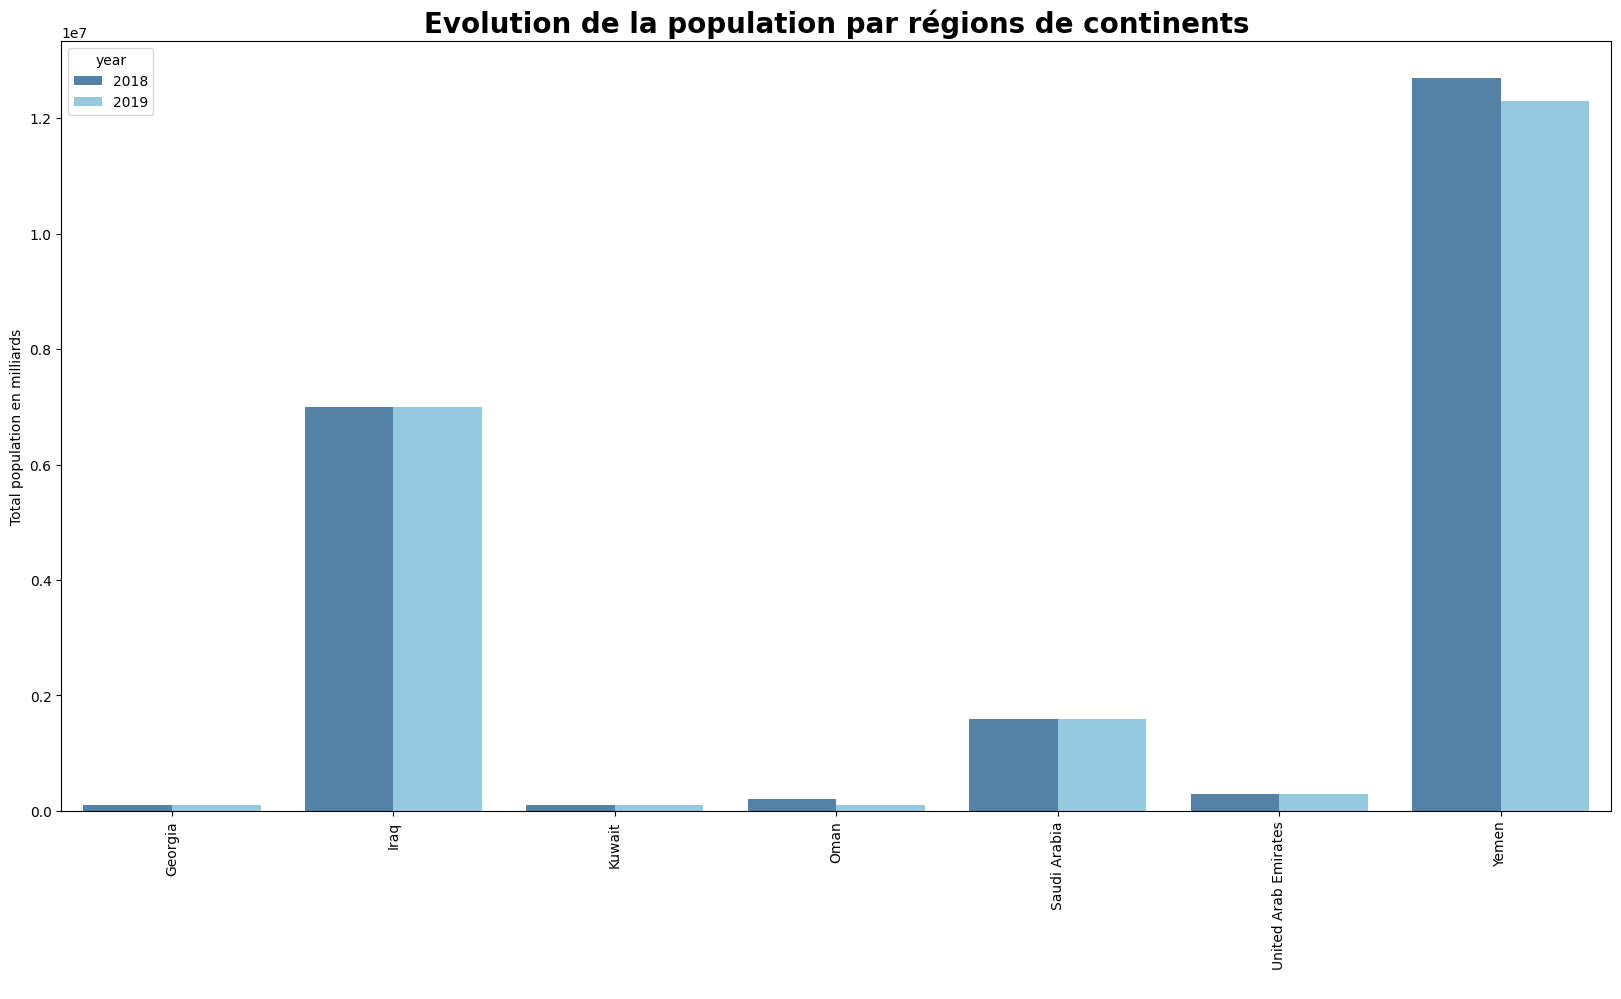

In [80]:
plt.figure(figsize=(20, 10))

custom_palette = {2018 : "steelblue", 2019: "skyblue"}

plt.title('Evolution de la population par régions de continents', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population en milliards')
sns.barplot(x='country', y='undernourished_people', data=df_westernasia, hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

In [81]:
filtre_afrique = df_sous_nutrition_pivot["continent"] == "Africa"
df_sous_nutrition_pivot.columns

MultiIndex([(                    'continent',   ''),
            (                'country_group',   ''),
            (                      'country',   ''),
            (             'total_population', 2018),
            (             'total_population', 2019),
            (        'undernourished_people', 2018),
            (        'undernourished_people', 2019),
            ('undernourished_people_percent', 2018),
            ('undernourished_people_percent', 2019)],
           names=[None, 'year'])

In [82]:
filtre_afrique = df_sous_nutrition["continent"] == "Africa"
df_sous_nutrition[filtre_afrique].sort_values(by="undernourished_people_percent", ascending=False).head(3)

,continent,country_group,country,year,total_population,undernourished_people,undernourished_people_percent
11,Africa,Eastern Africa,Madagascar,2019,27533.0,13000000.0,47216.07
33,Africa,Middle Africa,Central African Republic,2018,5094.0,2300000.0,45151.16
10,Africa,Eastern Africa,Madagascar,2018,26846.0,12000000.0,44699.40


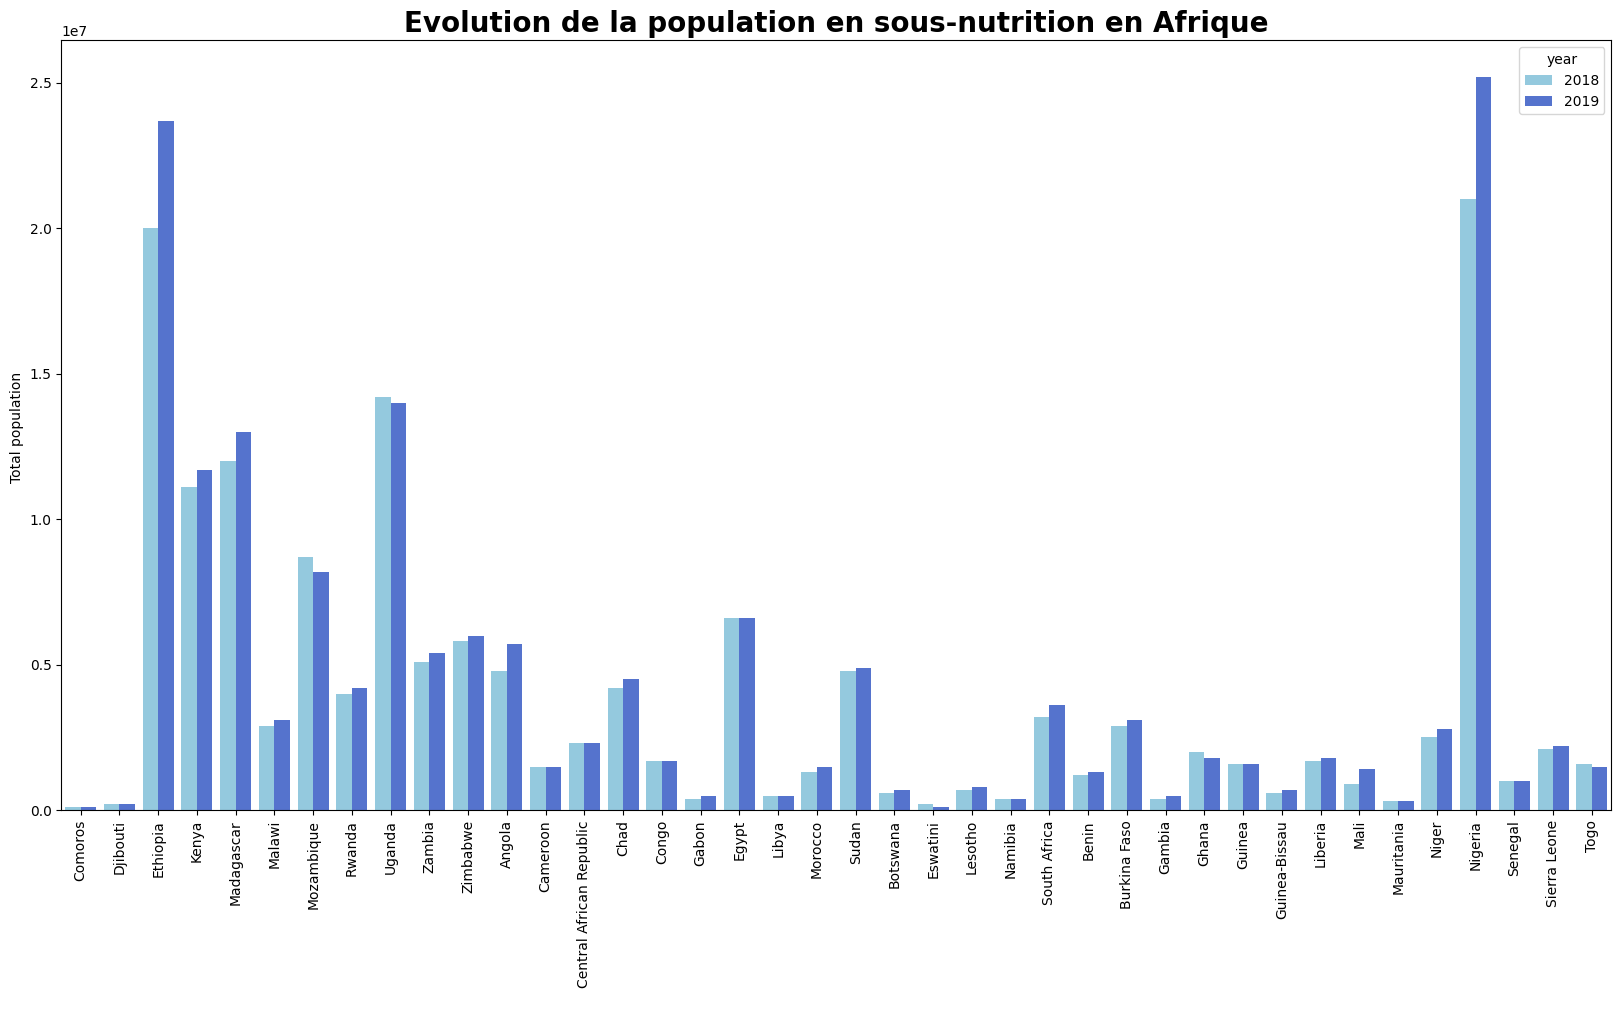

In [83]:
plt.figure(figsize=(20, 10))
custom_palette = {2018 : "skyblue", 2019: "royalblue"}

plt.title('Evolution de la population en sous-nutrition en Afrique', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population ')
sns.barplot(x='country', y="undernourished_people", data=df_sous_nutrition[filtre_afrique], hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

In [152]:
europapark = df_sous_nutrition["continent"] == "Europe"
df_euro = df_sous_nutrition[europapark]
df_euro = df_euro.groupby(["country_group", "country", "year"])["total_population"].sum()
df_euro = df_euro.reset_index()
df_euro = df_euro.sort_values(by="total_population", ascending=False)
df_euro 

,country_group,country,year,total_population
4,Eastern Europe,Ukraine,2018,44446.0
5,Eastern Europe,Ukraine,2019,44211.0
0,Eastern Europe,Bulgaria,2018,7117.0
1,Eastern Europe,Bulgaria,2019,7052.0
3,Eastern Europe,Slovakia,2019,5453.0
2,Eastern Europe,Slovakia,2018,5446.0
6,Southern Europe,Albania,2018,2877.0
7,Southern Europe,Albania,2019,2873.0


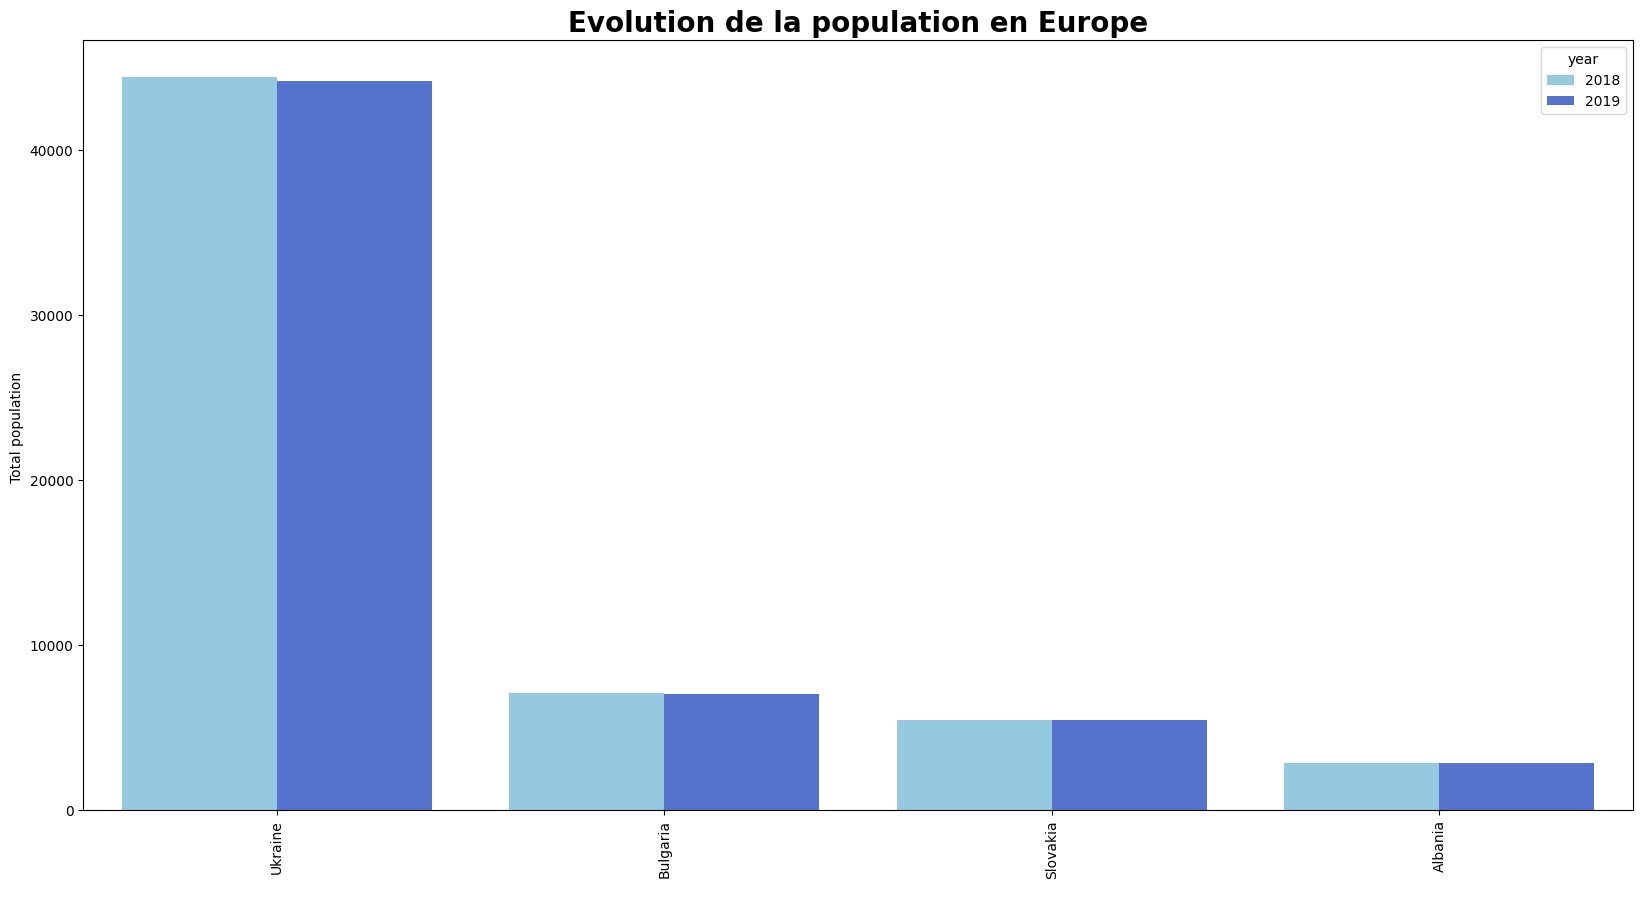

In [151]:
plt.figure(figsize=(20, 10))
custom_palette = {2018 : "skyblue", 2019: "royalblue"}

plt.title('Evolution de la population en Europe', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population ')
sns.barplot(x='country', y="total_population", data=df_euro, hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

In [164]:
europapark = final_df["continent"] == "Europe"
df_euro = final_df[europapark]
df_euro = df_euro.groupby(["country_group", "country", "year"])["pop_1000_hab"].sum()
df_euro = df_euro.reset_index()
df_euro = df_euro.sort_values(by="pop_1000_hab", ascending=False)
df_euro = df_euro.groupby(["country_group", "year"])["pop_1000_hab"].sum()
df_euro

country_group    year
Eastern Europe   2018    11053305.71
                 2019    11507526.87
Northern Europe  2018     3024955.92
                 2019     3064924.49
Southern Europe  2018    12198290.94
                 2019    12218987.70
Western Asia     2018      103600.55
                 2019      104451.40
Western Europe   2018    14126263.79
                 2019    14189454.43
Name: pop_1000_hab, dtype: float64

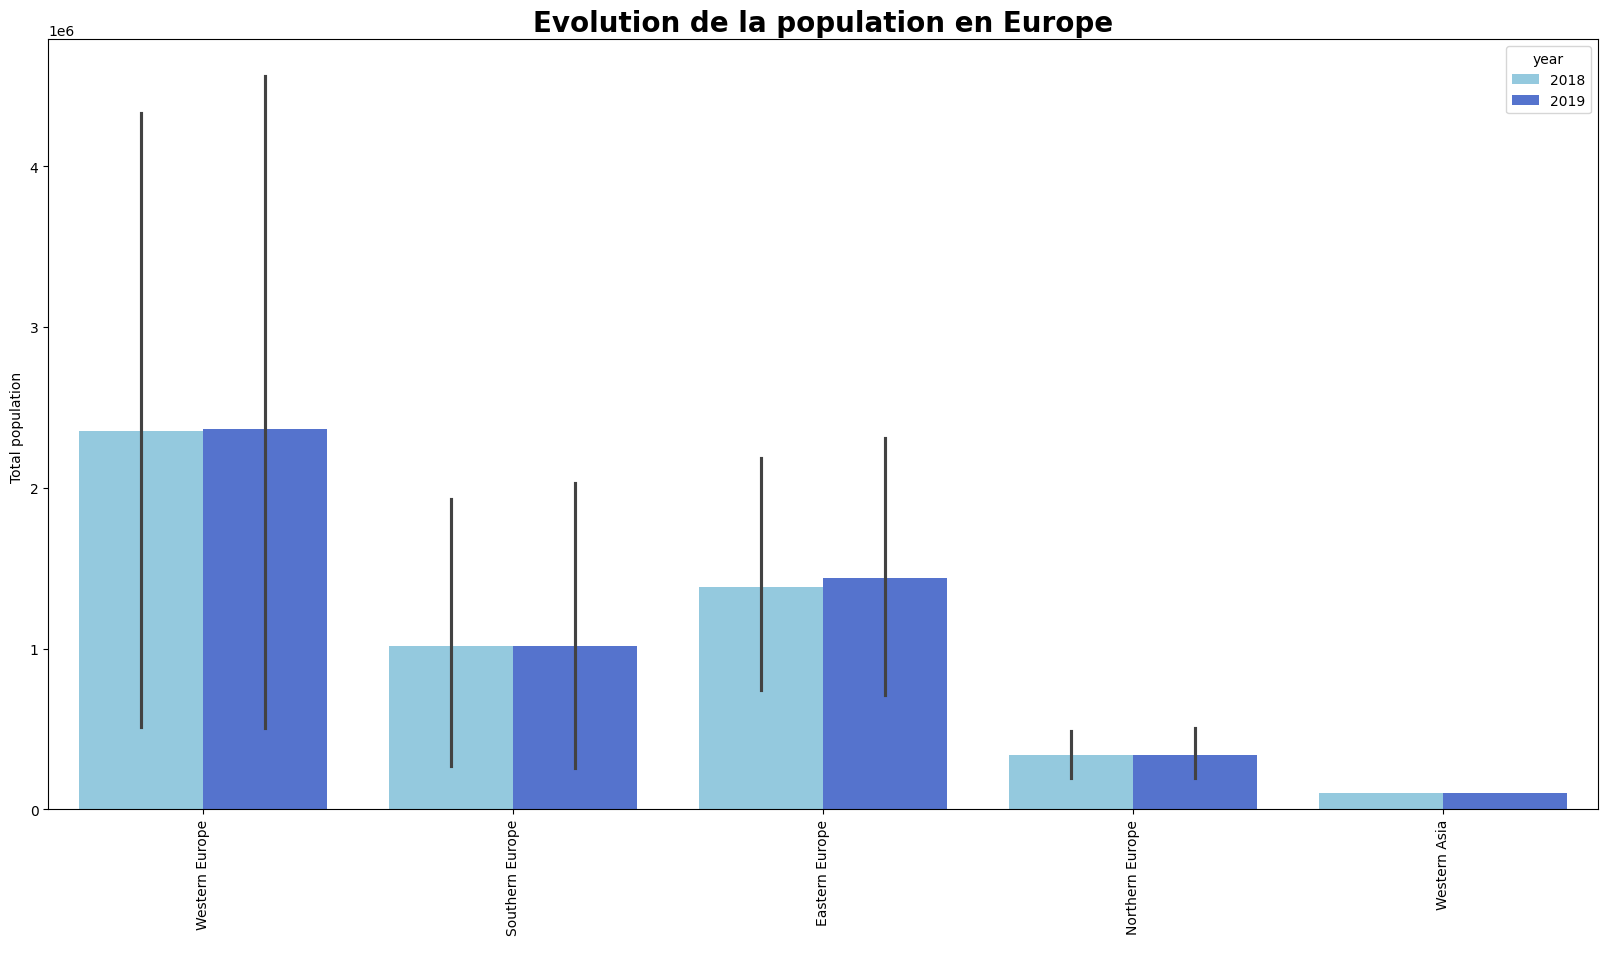

In [157]:
plt.figure(figsize=(20, 10))
custom_palette = {2018 : "skyblue", 2019: "royalblue"}

plt.title('Evolution de la population en Europe', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population ')
sns.barplot(x='country_group', y="pop_1000_hab", data=df_euro, hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

In [163]:
euroz = df_sous_nutrition["continent"] == "Europe"
df_sous_nutrition[euroz]

,continent,country_group,country,year,total_population,undernourished_people,undernourished_people_percent
161,Europe,Eastern Europe,Slovakia,2019,5453.0,100000.0,98.166147
150,Europe,Eastern Europe,Bulgaria,2018,7117.0,200000.0,97.189827
151,Europe,Eastern Europe,Bulgaria,2019,7052.0,200000.0,97.163925
162,Europe,Eastern Europe,Ukraine,2018,44446.0,1300000.0,97.075102
182,Europe,Southern Europe,Albania,2018,2877.0,100000.0,96.524157
183,Europe,Southern Europe,Albania,2019,2873.0,100000.0,96.519318
163,Europe,Eastern Europe,Ukraine,2019,44211.0,1600000.0,96.380991
160,Europe,Eastern Europe,Slovakia,2018,5446.0,200000.0,96.327580


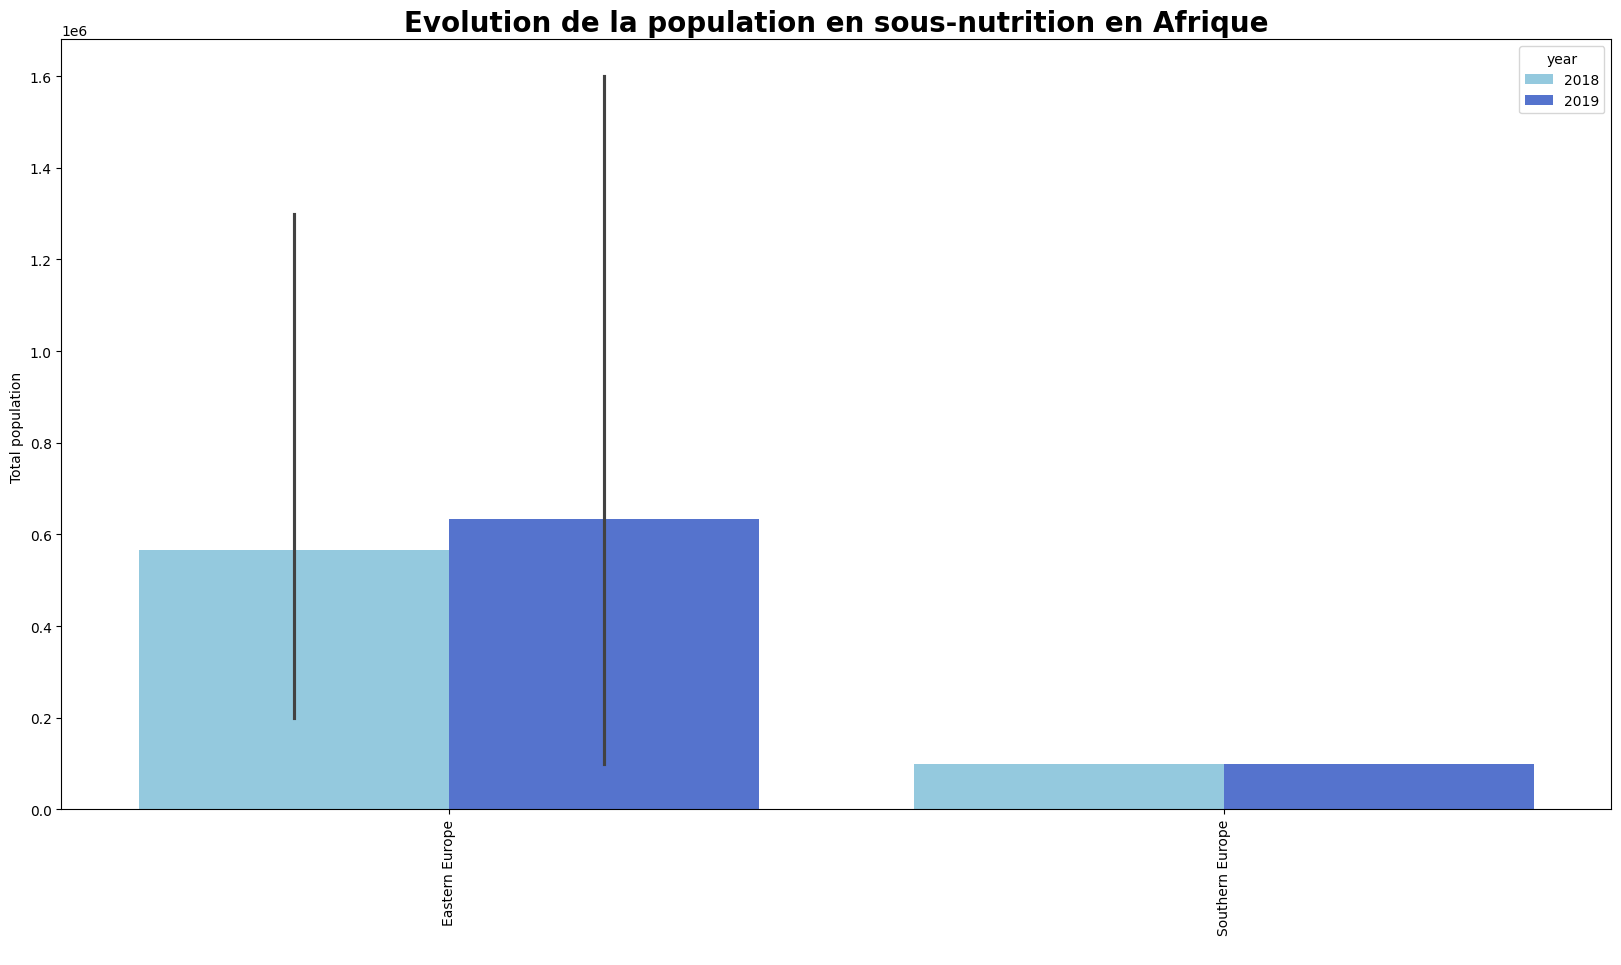

In [161]:
plt.figure(figsize=(20, 10))
custom_palette = {2018 : "skyblue", 2019: "royalblue"}

plt.title('Evolution de la population en sous-nutrition en Afrique', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population ')
sns.barplot(x='country_group', y="undernourished_people", data=df_sous_nutrition[euroz], hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

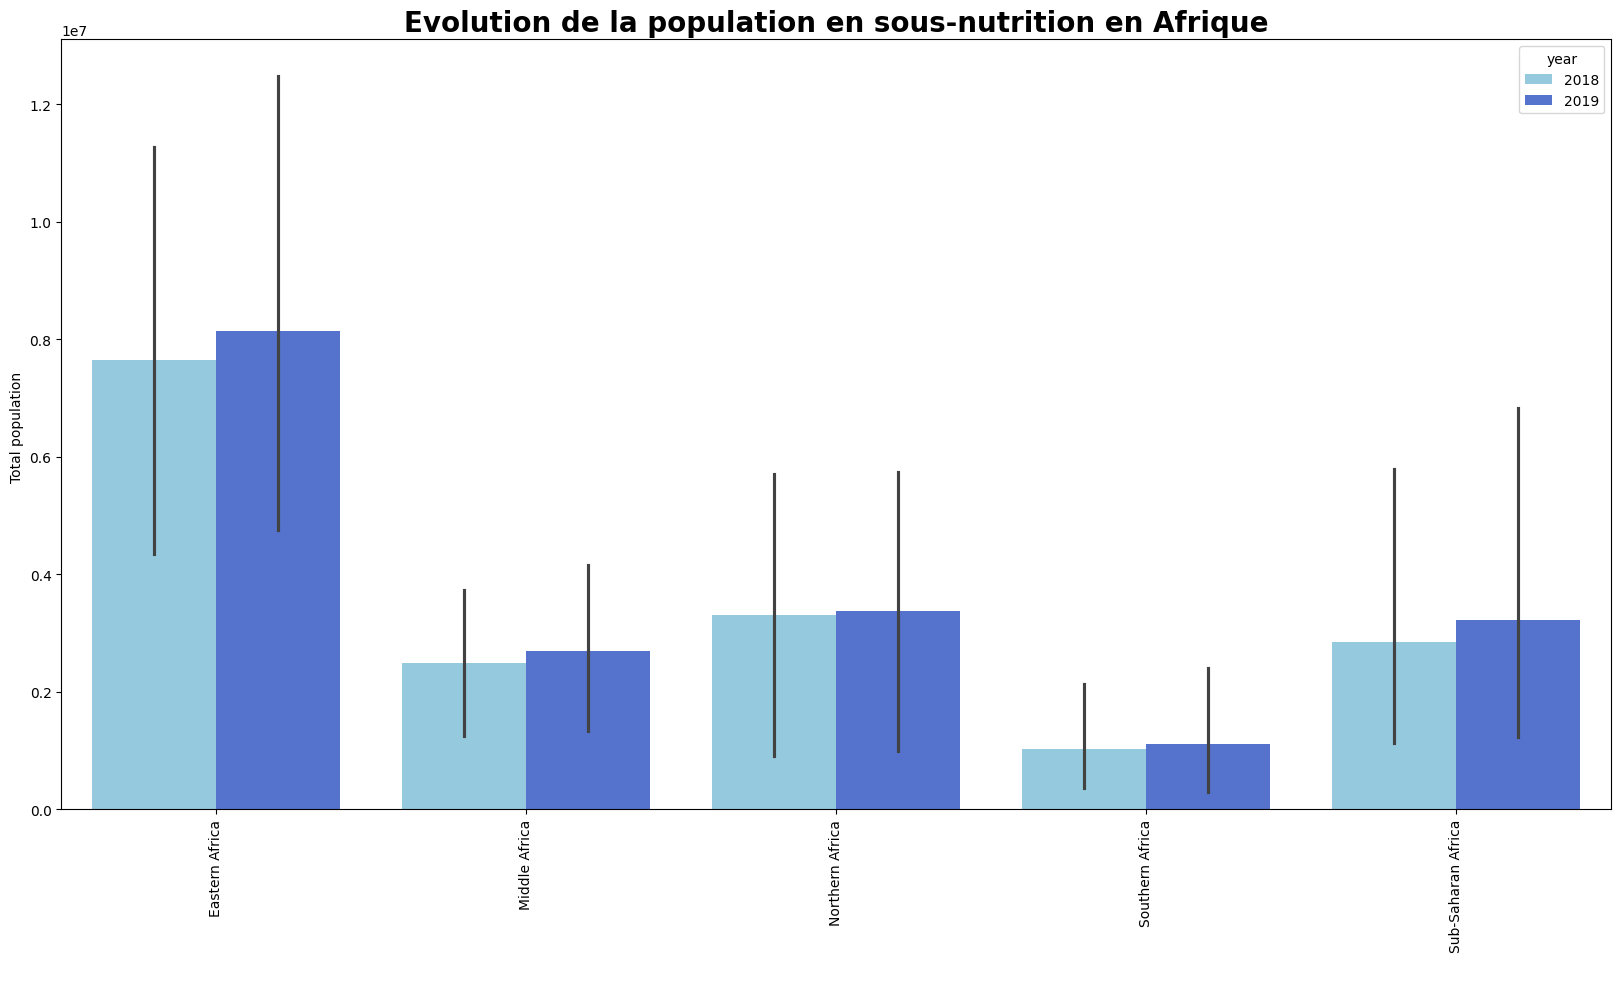

In [84]:
plt.figure(figsize=(20, 10))
custom_palette = {2018 : "skyblue", 2019: "royalblue"}

plt.title('Evolution de la population en sous-nutrition en Afrique', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population ')
sns.barplot(x='country_group', y="undernourished_people", data=df_sous_nutrition[filtre_afrique], hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

#### Quels sont les pays africains où la population en sous-nutrition a augmenté alors que la food supply a diminué en 2019 ?
Sierra Leone, Niger, Zimbabwe, Ethiopie (++) etc

In [118]:
af = final_df["continent"] == "Africa"
final_df_afriq = final_df[af]
final_df_afriq = final_df_afriq.groupby(["country", "year"])[["food_supply_quantity_(kg/capita/yr)"]].sum()
final_df_afriq = final_df_afriq.reset_index()
final_df_afriq.sort_values("food_supply_quantity_(kg/capita/yr)").head(7)

,country,year,food_supply_quantity_(kg/capita/yr)
92,Zimbabwe,2019,321.36
91,Zimbabwe,2018,329.38
33,Gambia,2019,338.79
17,Chad,2019,344.09
16,Chad,2018,353.44
28,Ethiopia,2018,354.53
29,Ethiopia,2019,356.14


In [85]:
af = final_df["continent"] == "Africa"
final_df_afriq = final_df[af]
final_df_afriq = final_df_afriq.groupby(["country", "year"])[["food_supply_(kcal/capita/day)"]].sum()
final_df_afriq = final_df_afriq.reset_index()

an_2018 = final_df_afriq["year"] == 2018

#final_df_afriq["difference"] = final_df_afriq[an_2018]["food_supply_(kcal/capita/day)"] - final_df_afriq[~an_2018]["food_supply_(kcal/capita/day)"]
final_df_afriq = final_df_afriq.pivot_table(index="country", columns="year", values="food_supply_(kcal/capita/day)")
final_df_afriq = final_df_afriq.reset_index()
final_df_afriq["difference_food_supply"] = final_df_afriq[2018] - final_df_afriq[2019]
food_supply_decreased = final_df_afriq["difference_food_supply"] > 0
final_df_afriq[food_supply_decreased].sort_values(by="difference_food_supply", ascending=False)


year,country,2018,2019,difference_food_supply
21,Lesotho,2184.79,1986.63,198.16
38,Sierra Leone,2349.03,2295.97,53.06
15,Gabon,2654.79,2605.15,49.64
32,Niger,2640.94,2595.69,45.25
46,Zimbabwe,2065.63,2024.55,41.08
14,Ethiopia,2449.83,2410.58,39.25
29,Morocco,3412.23,3385.76,26.47
24,Madagascar,2020.55,1994.50,26.05
1,Angola,2452.35,2426.63,25.72
4,Burkina Faso,2654.88,2629.34,25.54


ValueError: Could not interpret value `food_supply_quantity_(kg/capita/yr)` for `y`. An entry with this name does not appear in `data`.

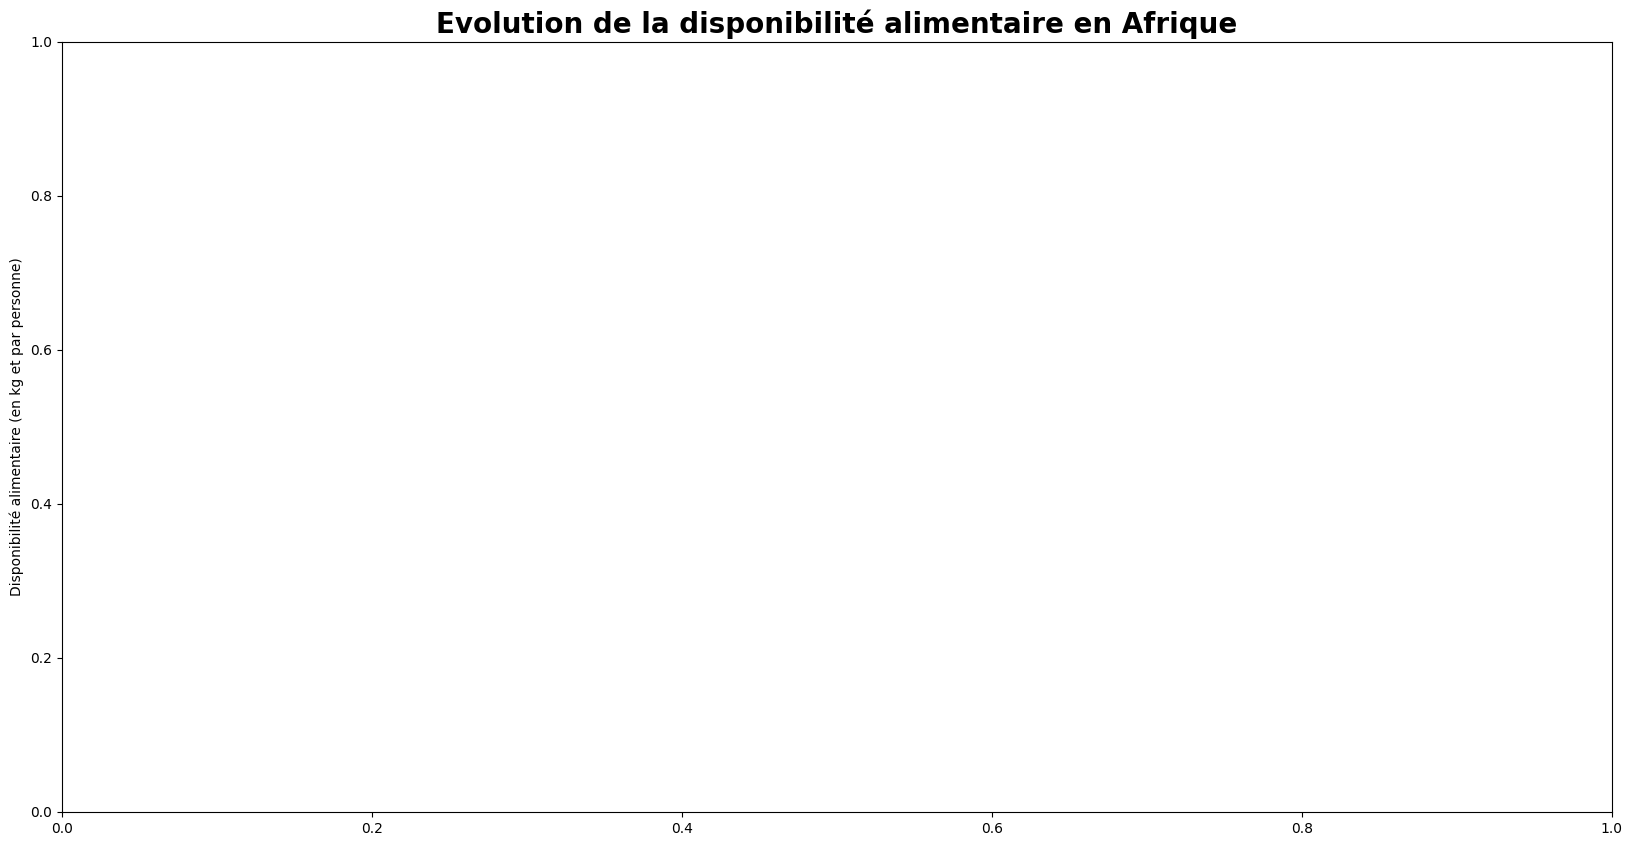

In [86]:
plt.figure(figsize=(20, 10))

custom_palette = {2018 : "gold", 2019: "darkorange"}

plt.title('Evolution de la disponibilité alimentaire en Afrique', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Disponibilité alimentaire (en kg et par personne)')
sns.barplot(x='country', y="food_supply_quantity_(kg/capita/yr)", data=final_df_afriq, hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20, 10))

custom_palette = {2018 : "gold", 2019: "darkorange"}

plt.title('Evolution de la population en sous-nutrition en Afrique', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population ')
sns.barplot(x='country', y="undernourished_people", data=df_sous_nutrition[filtre_afrique], hue="year")
plt.xticks(rotation=90)

plt.show()

In [ ]:
filtre_europe = df_sous_nutrition["continent"] == "Europe"
df_sous_nutrition[filtre_europe].sort_values(by="undernourished_people_percent", ascending=False).head(20)

,continent,country_group,country,year,total_population,undernourished_people,undernourished_people_percent
160,Europe,Eastern Europe,Slovakia,2018,5446750.0,200000.0,3.67
163,Europe,Eastern Europe,Ukraine,2019,44211100.0,1600000.0,3.62
182,Europe,Southern Europe,Albania,2018,2877010.0,100000.0,3.48
183,Europe,Southern Europe,Albania,2019,2873880.0,100000.0,3.48
162,Europe,Eastern Europe,Ukraine,2018,44446950.0,1300000.0,2.92
151,Europe,Eastern Europe,Bulgaria,2019,7052530.0,200000.0,2.84
150,Europe,Eastern Europe,Bulgaria,2018,7117430.0,200000.0,2.81
161,Europe,Eastern Europe,Slovakia,2019,5453920.0,100000.0,1.83


In [ ]:
df_sous_nutrition[filtre_afrique]

,continent,country_group,country,year,total_population,undernourished_people,undernourished_people_percent
2,Africa,Eastern Africa,Comoros,2018,776310.0,100000.0,12.88
3,Africa,Eastern Africa,Comoros,2019,790990.0,100000.0,12.64
4,Africa,Eastern Africa,Djibouti,2018,1057200.0,200000.0,18.92
5,Africa,Eastern Africa,Djibouti,2019,1073990.0,200000.0,18.62
6,Africa,Eastern Africa,Ethiopia,2018,111129440.0,20000000.0,18.00
...,...,...,...,...,...,...,...
88,Africa,Sub-Saharan Africa,Senegal,2019,16000780.0,1000000.0,6.25
89,Africa,Sub-Saharan Africa,Sierra Leone,2018,7861280.0,2100000.0,26.71
90,Africa,Sub-Saharan Africa,Sierra Leone,2019,8046830.0,2200000.0,27.34
91,Africa,Sub-Saharan Africa,Togo,2018,8046680.0,1600000.0,19.88


In [ ]:
print(f'Total médian de personnes en sous-nutrition sur le continent européen : {df_sous_nutrition[filtre_europe]["undernourished_people_percent"].median()}')
print(f'Total médian de personnes en sous-nutrition sur le continent africain : {round(df_sous_nutrition[filtre_afrique]["undernourished_people_percent"].mean(),1)}, soit plus de ')

Total médian de personnes en sous-nutrition sur le continent européen : 3.2
Total médian de personnes en sous-nutrition sur le continent africain : 19.7, soit plus de 


In [ ]:
filtre_asia = df_sous_nutrition["continent"] == "Asia"
# df_sous_nutrition[filtre_asia].sort_values(by="undernourished_people_percent", ascending=False).head(20)
df_sous_nutrition[filtre_asia]

,continent,country_group,country,year,total_population,undernourished_people,undernourished_people_percent
95,Asia,Central Asia,Kyrgyzstan,2018,6.223490e+06,300000.0,4.82
96,Asia,Central Asia,Kyrgyzstan,2019,6.323640e+06,300000.0,4.74
97,Asia,Central Asia,Tajikistan,2018,9.128130e+06,1000000.0,10.96
98,Asia,Central Asia,Tajikistan,2019,9.337000e+06,900000.0,9.64
99,Asia,Central Asia,Turkmenistan,2018,6.065070e+06,300000.0,4.95
100,Asia,Central Asia,Turkmenistan,2019,6.158420e+06,400000.0,6.50
105,Asia,Eastern Asia,Mongolia,2018,3.163990e+06,200000.0,6.32
106,Asia,Eastern Asia,Mongolia,2019,3.232430e+06,200000.0,6.19
107,Asia,Southern Asia,Afghanistan,2018,3.668678e+07,8800000.0,23.99
108,Asia,Southern Asia,Afghanistan,2019,3.776950e+07,10200000.0,27.01


In [ ]:
df_sous_nutrition_pivot.columns

MultiIndex([(                    'continent',   ''),
            (                'country_group',   ''),
            (                      'country',   ''),
            (             'total_population', 2018),
            (             'total_population', 2019),
            (        'undernourished_people', 2018),
            (        'undernourished_people', 2019),
            ('undernourished_people_percent', 2018),
            ('undernourished_people_percent', 2019)],
           names=[None, 'year'])

In [ ]:
filtre_southam = df_sous_nutrition_pivot["continent"] == "South America"
df_sous_nutrition_pivot[filtre_southam & filter_2019].sort_values(by=[("undernourished_people_percent", 2019)], ascending=False).head(20)

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_16356\3893784991.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sous_nutrition_pivot[filtre_southam & filter_2019].sort_values(by=[("undernourished_people_percent", 2019)], ascending=False).head(20)


continent  country_group    country total_population              \
year                                                      2018        2019   
76    South America  South America   Colombia       49276960.0  50187410.0   
74    South America  South America  Argentina       44413600.0  44745520.0   
78    South America  South America   Paraguay        6443330.0   6530030.0   

     undernourished_people            undernourished_people_percent        
year                  2018       2019                          2018  2019  
76               2300000.0  2700000.0                          4.67  5.38  
74               1500000.0  1500000.0                          3.38  3.35  
78                200000.0   200000.0                          3.10  3.06

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_16356\30204219.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.barplot(x='country', y=[("total_population", 2019),("undernourished_people", 2019)], data=df_sous_nutrition_pivot[filtre_southam & filter_2019], hue="year", palette=custom_palette)


ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 3 and the vector passed to `y` has length 2.

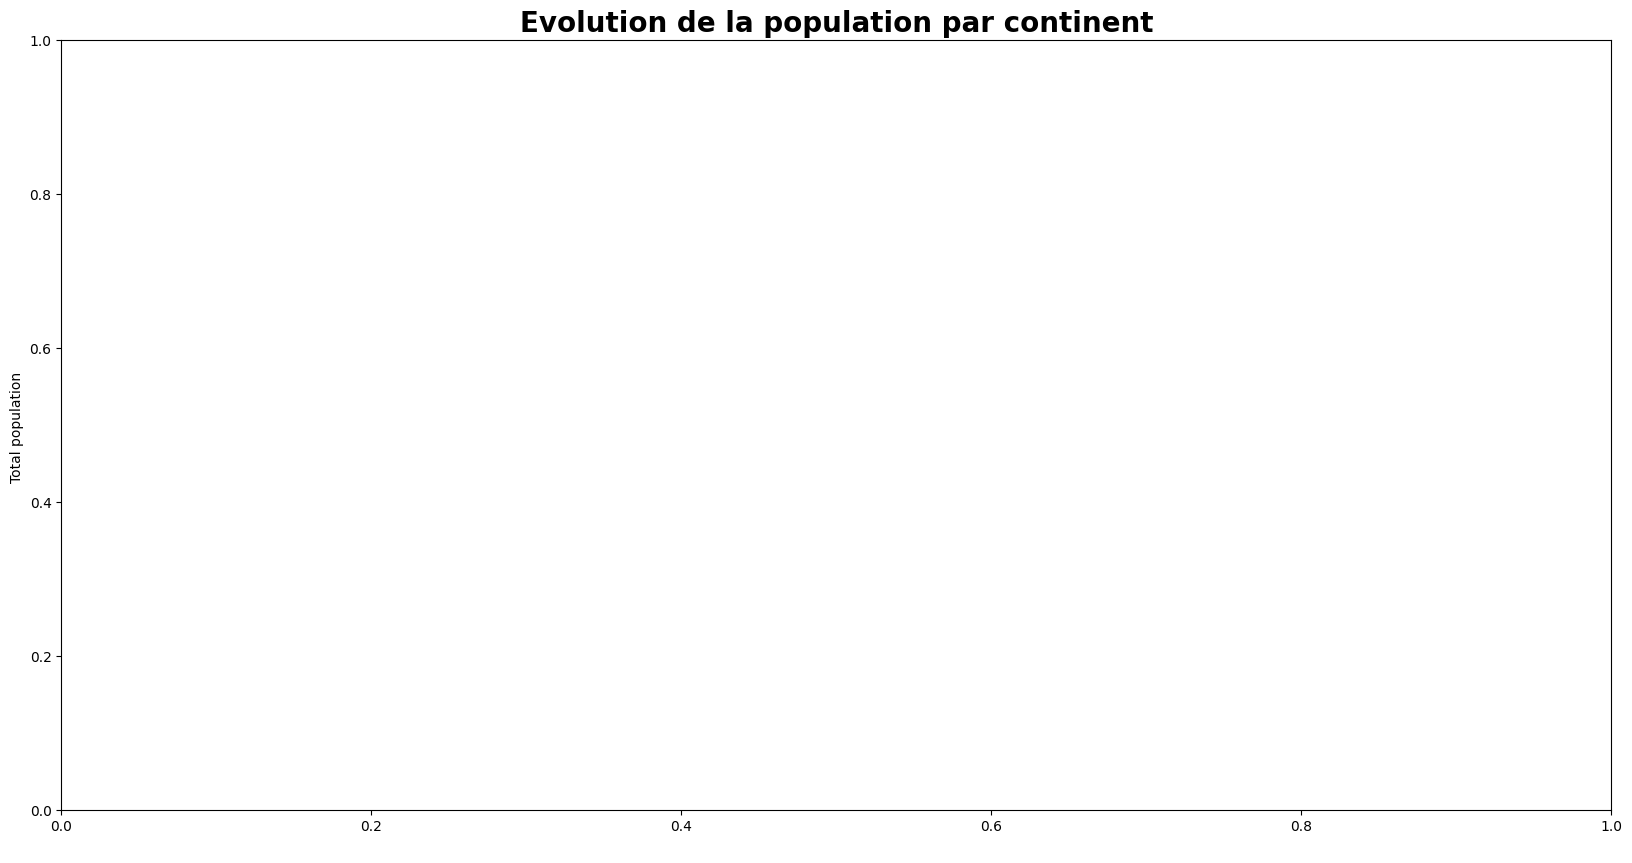

In [ ]:
plt.figure(figsize=(20, 10))

custom_palette = {2018 : "gold", 2019: "darkorange"}

plt.title('Evolution de la population par continent', fontsize="20", fontweight="bold")
plt.xlabel(' ')
plt.ylabel('Total population ')
sns.barplot(x='country', y=[("total_population", 2019),("undernourished_people", 2019)], data=df_sous_nutrition_pivot[filtre_southam & filter_2019], hue="year", palette=custom_palette)
plt.xticks(rotation=90)

plt.show()